# <span style="font-family:cursive;text-align:center">⬇️ Import Libraries</span>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from mlxtend.evaluate import mcnemar_table, mcnemar_tables
from mlxtend.plotting import checkerboard_plot, plot_decision_regions
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.evaluate import bias_variance_decomp
from sklearn.decomposition import PCA
%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

# py.init_notebook_mode()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# <span style="font-family:cursive;text-align:center">⬇️ Import Data</span>

In [3]:
df = pd.read_csv("dataset.csv")

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Use head, tail and sample to see various records in df </b><br>

</div>

In [5]:
df.head(5) #returns the number of rows given as a parameter or by default '5' from the top

ID  age   gender               education                class  \
0  ID_TZ0000   79   Female    High school graduate                  NaN   
1  ID_TZ0001   65   Female    High school graduate                  NaN   
2  ID_TZ0002   21     Male   12th grade no diploma   Federal government   
3  ID_TZ0003    2   Female                Children                  NaN   
4  ID_TZ0004   70     Male    High school graduate                  NaN   

  education_institute                    marital_status  \
0                 NaN                           Widowed   
1                 NaN                           Widowed   
2                 NaN                     Never married   
3                 NaN                     Never married   
4                 NaN   Married-civilian spouse present   

                         race is_hispanic      employment_commitment  ...  \
0                       White   All other         Not in labor force  ...   
1                       White   All other   Children or Armed Forces  ...   
2                       Black   All other   Children or Armed Forces  ...   
3   Asian or Pacific Islander   All other   Children or Armed Forces  ...   
4                       White   All other         Not in labor force  ...   

  country_of_birth_mother  migration_code_change_in_msa  \
0                      US                             ?   
1                      US                     unchanged   
2                      US                     unchanged   
3                   India                     unchanged   
4                      US                             ?   

   migration_prev_sunbelt migration_code_move_within_reg  \
0                       ?                              ?   
1                     NaN                      unchanged   
2                     NaN                      unchanged   
3                     NaN                      unchanged   
4                       ?                              ?   

   migration_code_change_in_reg  residence_1_year_ago old_residence_reg  \
0                             ?                   NaN               NaN   
1                     unchanged                  Same               NaN   
2                     unchanged                  Same               NaN   
3                     unchanged                  Same               NaN   
4                             ?                   NaN               NaN   

   old_residence_state importance_of_record  income_above_limit  
0                  NaN              1779.74         Below limit  
1                  NaN              2366.75         Below limit  
2                  NaN              1693.42         Below limit  
3                  NaN              1380.27         Below limit  
4                  NaN              1580.79         Below limit  

[5 rows x 43 columns]

In [6]:
df.tail(2) #returns the number of rows given as a parameter or by default '5' from the bottom

ID  age   gender                    education  \
209497  ID_TZ99998   26   Female   Some college but no degree   
209498  ID_TZ99999   19     Male                   11th grade   

                    class education_institute  \
209497            Private                 NaN   
209498   Local government         High school   

                          marital_status    race is_hispanic  \
209497   Married-civilian spouse present   White   All other   
209498                     Never married   Black   All other   

            employment_commitment  ... country_of_birth_mother  \
209497   Children or Armed Forces  ...                      US   
209498   Children or Armed Forces  ...                      US   

        migration_code_change_in_msa  migration_prev_sunbelt  \
209497                     unchanged                     NaN   
209498                    MSA to MSA                    Same   

       migration_code_move_within_reg  migration_code_change_in_reg  \
209497                      unchanged                     unchanged   
209498                    Same county                   Same county   

        residence_1_year_ago old_residence_reg  old_residence_state  \
209497                  Same               NaN                  NaN   
209498                    No             South              Florida   

       importance_of_record  income_above_limit  
209497              3530.26         Below limit  
209498              1987.72         Below limit  

[2 rows x 43 columns]

In [7]:
df.sample(4) # returns random rows on every run

ID  age   gender                    education  \
101718  ID_TZ190736   10     Male                     Children   
197869   ID_TZ89427   19   Female   Some college but no degree   
146476   ID_TZ42706    8   Female                     Children   
101041  ID_TZ190126   25     Male         High school graduate   

                    class     education_institute  \
101718                NaN                     NaN   
197869   State government   College or university   
146476                NaN                     NaN   
101041            Private                     NaN   

                          marital_status    race is_hispanic  \
101718                     Never married   White   All other   
197869                     Never married   Black   All other   
146476                     Never married   White   All other   
101041   Married-civilian spouse present   White   All other   

            employment_commitment  ... country_of_birth_mother  \
101718   Children or Armed Forces  ...                      US   
197869        Full-time schedules  ...                      US   
146476   Children or Armed Forces  ...                       ?   
101041        Full-time schedules  ...                      US   

        migration_code_change_in_msa  migration_prev_sunbelt  \
101718                     unchanged                     NaN   
197869                             ?                       ?   
146476                             ?                       ?   
101041                             ?                       ?   

       migration_code_move_within_reg  migration_code_change_in_reg  \
101718                      unchanged                     unchanged   
197869                              ?                             ?   
146476                              ?                             ?   
101041                              ?                             ?   

        residence_1_year_ago old_residence_reg  old_residence_state  \
101718                  Same               NaN                  NaN   
197869                   NaN               NaN                  NaN   
146476                   NaN               NaN                  NaN   
101041                   NaN               NaN                  NaN   

       importance_of_record  income_above_limit  
101718              1380.82         Below limit  
197869              1289.36         Below limit  
146476              1052.83         Below limit  
101041              1031.73         Below limit  

[4 rows x 43 columns]

# <span style="font-family:cursive;text-align:center">📊 Exploratory Data Analysis</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>To check shape of the dataframe use .shape() function which return (rows,columns)</b><br>
    📌 &nbsp;<b>To see the name of columns use .columns function which returns name of columns as a list</b><br>
</div>

In [8]:
df.shape

(209499, 43)

In [9]:
df.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [10]:
col_map={
    'ID': 'id',
}
df.rename(columns=col_map, inplace=True)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b> .info() prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.</b><br>
    📌 &nbsp;<b>.describe(): Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.</b><br>
</div>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [13]:
df.describe().T

count         mean          std    min      25%  \
age                    209499.0    34.518728    22.306738   0.00    15.00   
employment_stat        209499.0     0.176760     0.555562   0.00     0.00   
wage_per_hour          209499.0    55.433487   276.757327   0.00     0.00   
working_week_per_year  209499.0    23.158850    24.397963   0.00     0.00   
industry_code          209499.0    15.332398    18.049655   0.00     0.00   
occupation_code        209499.0    11.321734    14.460839   0.00     0.00   
total_employed         209499.0     1.956067     2.365154   0.00     0.00   
vet_benefit            209499.0     1.515854     0.850853   0.00     2.00   
gains                  209499.0   435.926887  4696.359500   0.00     0.00   
losses                 209499.0    36.881737   270.383302   0.00     0.00   
stocks_status          209499.0   194.533420  1956.375501   0.00     0.00   
mig_year               209499.0    94.499745     0.500001  94.00    94.00   
importance_of_record   209499.0  1740.888324   995.559557  37.87  1061.29   

                           50%      75%      max  
age                      33.00    50.00     90.0  
employment_stat           0.00     0.00      2.0  
wage_per_hour             0.00     0.00   9999.0  
working_week_per_year     8.00    52.00     52.0  
industry_code             0.00    33.00     51.0  
occupation_code           0.00    26.00     46.0  
total_employed            1.00     4.00      6.0  
vet_benefit               2.00     2.00      2.0  
gains                     0.00     0.00  99999.0  
losses                    0.00     0.00   4608.0  
stocks_status             0.00     0.00  99999.0  
mig_year                 94.00    95.00     95.0  
importance_of_record   1617.04  2185.48  18656.3

In [14]:
df.describe(include=['O']).T # to include categorical columns

count  unique  \
id                              209499  209499   
gender                          209499       2   
education                       209499      17   
class                           104254       8   
education_institute              13302       2   
marital_status                  209499       7   
race                            209499       5   
is_hispanic                     209499      10   
employment_commitment           209499       8   
unemployment_reason               6520       5   
is_labor_union                   20079       2   
industry_code_main              209499      24   
occupation_code_main            103805      14   
household_stat                  209499      38   
household_summary               209499       8   
under_18_family                  57845       4   
veterans_admin_questionnaire      2084       2   
tax_status                      209499       6   
citizenship                     209499       5   
country_of_birth_own            209499      43   
country_of_birth_father         209499      43   
country_of_birth_mother         209499      43   
migration_code_change_in_msa    207911       9   
migration_prev_sunbelt          121047       3   
migration_code_move_within_reg  207911       9   
migration_code_change_in_reg    207911       8   
residence_1_year_ago            103215       2   
old_residence_reg                16351       5   
old_residence_state              16351      50   
income_above_limit              209499       2   

                                                            top    freq  
id                                                    ID_TZ0000       1  
gender                                                   Female  108784  
education                                  High school graduate   50627  
class                                                   Private   75617  
education_institute                                 High school    7247  
marital_status                                    Never married   90723  
race                                                      White  175709  
is_hispanic                                           All other  180404  
employment_commitment                  Children or Armed Forces  129789  
unemployment_reason                             Other job loser    2242  
is_labor_union                                               No   16968  
industry_code_main                  Not in universe or children  105694  
occupation_code_main             Adm support including clerical   15351  
household_stat                                      Householder   56195  
household_summary                                   Householder   79470  
under_18_family                            Both parents present   40875  
veterans_admin_questionnaire                                 No    1684  
tax_status                                             Nonfiler   78671  
citizenship                                              Native  185669  
country_of_birth_own                                         US  185666  
country_of_birth_father                                      US  166968  
country_of_birth_mother                                      US  168233  
migration_code_change_in_msa                                  ?  104696  
migration_prev_sunbelt                                        ?  104696  
migration_code_move_within_reg                                ?  104696  
migration_code_change_in_reg                                  ?  104696  
residence_1_year_ago                                       Same   86864  
old_residence_reg                                         South    5056  
old_residence_state                                  California    1849  
income_above_limit                                  Below limit  196501


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Dateaset has "?" value. Hence replacing it with NaN</b><br>
</div>

In [16]:
df.replace({' ?':np.nan},inplace=True)

In [17]:
df.isna().sum() # add .sum() to get total count of missing values in column

id                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>.duplicated(): Detect duplicate values.</b><br>
</div>

In [18]:
print("Number of duplicates: ", df.duplicated().sum())

Number of duplicates:  0


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>.unique(): returns unique values.</b><br>
    📌 &nbsp;<b>.nunique(): returns the count of unique values.</b><br>
</div>

In [19]:
print("Unique values per column:")
df.nunique()

Unique values per column:


id                                209499
age                                   91
gender                                 2
education                             17
class                                  8
education_institute                    2
marital_status                         7
race                                   5
is_hispanic                           10
employment_commitment                  8
unemployment_reason                    5
employment_stat                        3
wage_per_hour                       1232
is_labor_union                         2
working_week_per_year                 53
industry_code                         52
industry_code_main                    24
occupation_code                       47
occupation_code_main                  14
total_employed                         7
household_stat                        38
household_summary                      8
under_18_family                        4
veterans_admin_questionnaire           2
vet_benefit     

In [20]:
for i in df.columns:
    print(f"Unique value in {i}:")
    print(df[i].unique(),'\n')

Unique value in id:
['ID_TZ0000' 'ID_TZ0001' 'ID_TZ0002' ... 'ID_TZ99997' 'ID_TZ99998'
 'ID_TZ99999'] 

Unique value in age:
[79 65 21  2 70 45 53 22 73 30  4 16 43 36  5 88 40 47 59 69 50 27 39 85
 29 41 14 33 67 52 11  9 13 19 26 23 37 58 63 46 62 28 31  3 18 78 15 38
  7 35  1 20  0 48 24 56 25  8 66 71 32 75 51 10 44 42 55 74 77 34 80 17
 83 86 12 68 60 57 64 72 90 61 82  6 84 49 76 54 89 81 87] 

Unique value in gender:
[' Female' ' Male'] 

Unique value in education:
[' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)'] 

Unique value in class:
[nan ' Federal government' ' Private' ' Loca

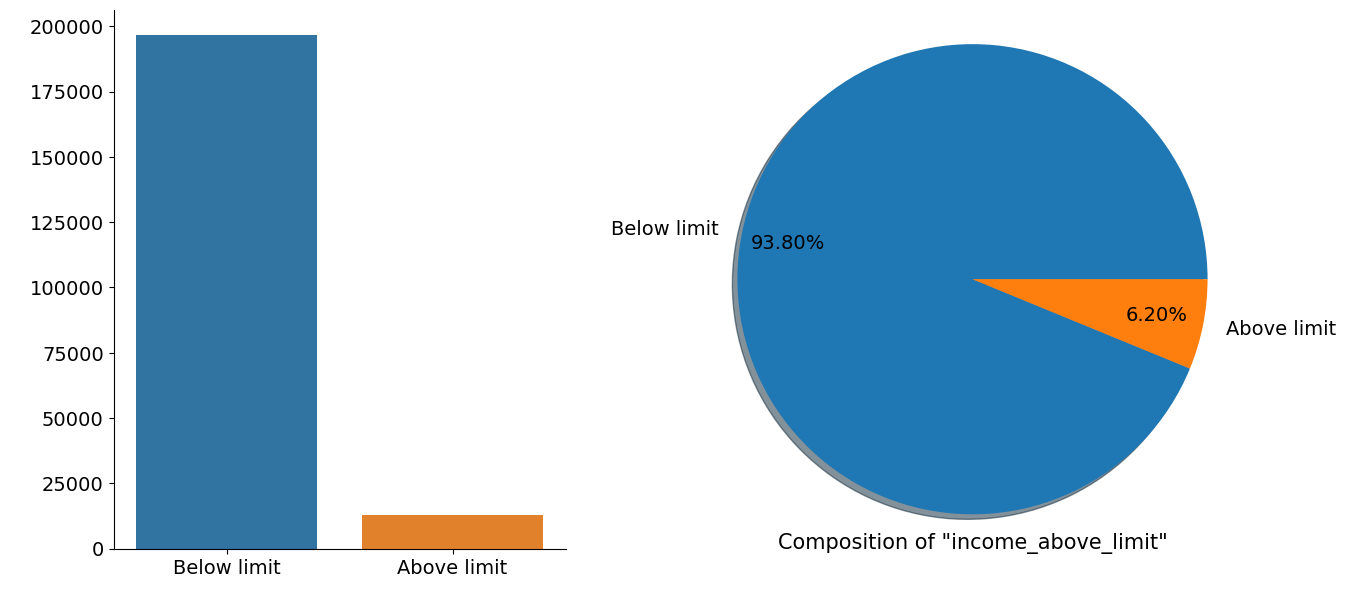

In [21]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["income_above_limit"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df["income_above_limit"].value_counts(),
        labels=list(df["income_above_limit"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "income_above_limit"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [22]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'


In [23]:
fig = px.treemap(df, path=['income_above_limit'], width=800, height=400)
fig.update_layout(
    margin = dict(t=50, l=25, r=25, b=25))
# fig.show()

py.init_notebook_mode(connected=True)
py.iplot(fig,filename= "treemap")

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
        
* The dataset is unbalanced, as the dependent feature 'income_above_limit' contains 94% values have income less than limit and 6% values have income more than limit
* So many null values are also present which is not great

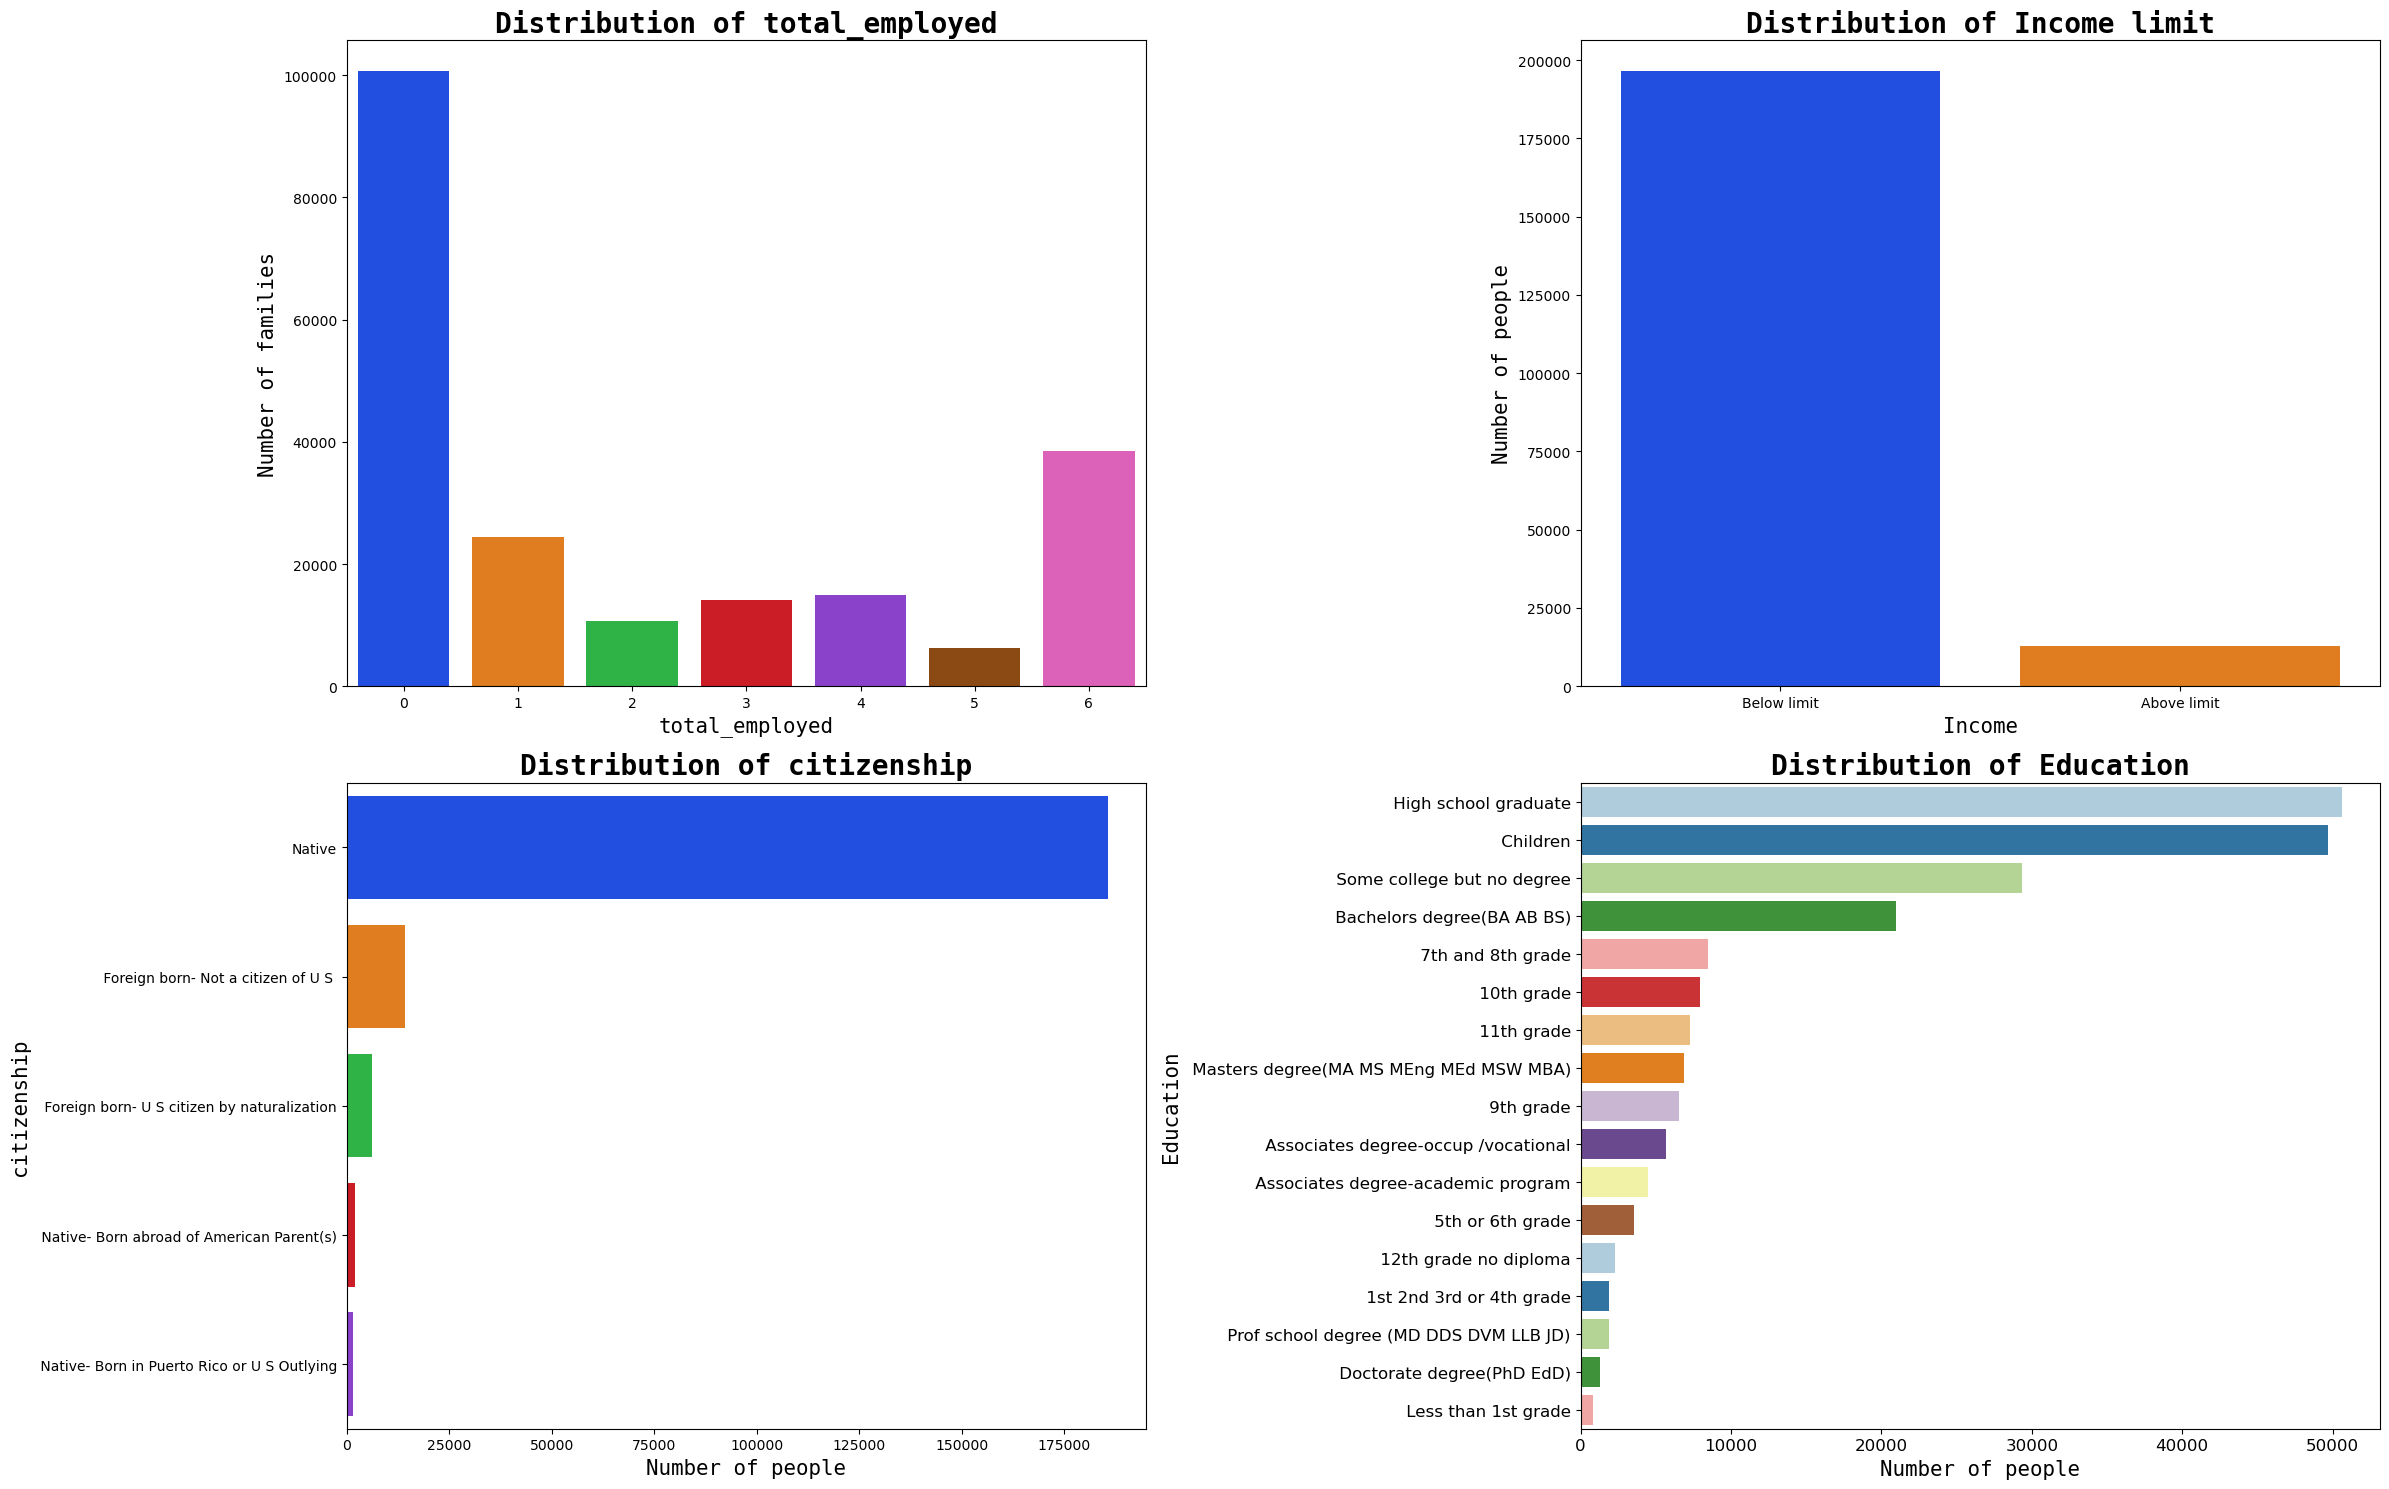

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(24, 15))

# Distribution of total_employed
total_employed = df['total_employed'].value_counts()
sns.barplot(x=total_employed.index, y=total_employed.values, palette='bright', ax=axs[0,0])
axs[0,0].set_title('Distribution of total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[0,0].set_xlabel('total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,0].set_ylabel('Number of families', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,0].tick_params(labelsize=10)

# Distribution of Income limit
income = df['income_above_limit'].value_counts()
sns.barplot(x=income.index, y=income.values, palette='bright', ax=axs[0,1])
axs[0,1].set_title('Distribution of Income limit', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[0,1].set_xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,1].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,1].tick_params(labelsize=10)

citizenship = df['citizenship'].value_counts()
sns.barplot(y=citizenship.index,x=citizenship.values,palette='bright',ax=axs[1,0])
axs[1,0].set_title('Distribution of citizenship', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[1,0].set_ylabel('citizenship', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,0].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,0].tick_params(labelsize=10)

edu = df['education'].value_counts()
sns.barplot(x=edu.values, y=edu.index, palette='Paired',ax=axs[1,1])
axs[1,1].set_title('Distribution of Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[1,1].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,1].set_ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,1].tick_params(labelsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

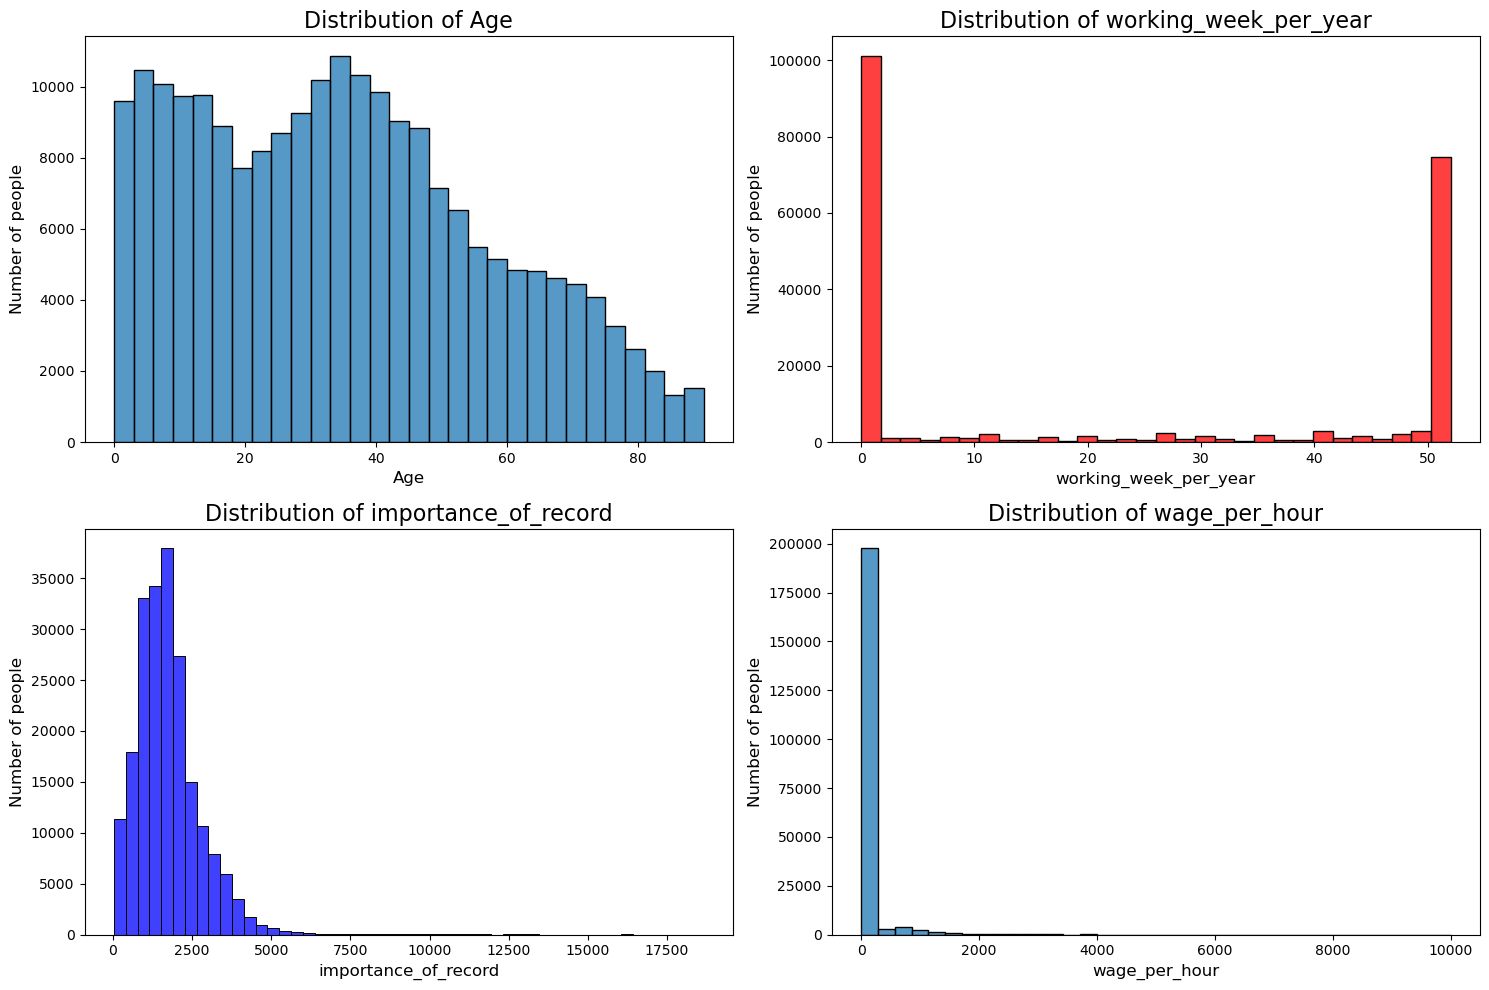

In [38]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))




# Plot the distribution of Age
sns.histplot(df['age'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age', fontsize=16)
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Number of people', fontsize=12)

# Plot the distribution of working_week_per_year
sns.histplot(df['working_week_per_year'], bins=30, color='red', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of working_week_per_year', fontsize=16)
axes[0, 1].set_xlabel('working_week_per_year', fontsize=12)
axes[0, 1].set_ylabel('Number of people', fontsize=12)

# Plot the distribution of importance_of_record
sns.histplot(df['importance_of_record'], bins=50, color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of importance_of_record', fontsize=16)
axes[1, 0].set_xlabel('importance_of_record', fontsize=12)
axes[1, 0].set_ylabel('Number of people', fontsize=12)

# Plot the distribution of wage_per_hour
sns.histplot(df['wage_per_hour'], bins=35, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of wage_per_hour', fontsize=16)
axes[1, 1].set_xlabel('wage_per_hour', fontsize=12)
axes[1, 1].set_ylabel('Number of people', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Question 1: Is Race impacting income?</font>

In [26]:
hypothesis_df = df.copy(deep=True)

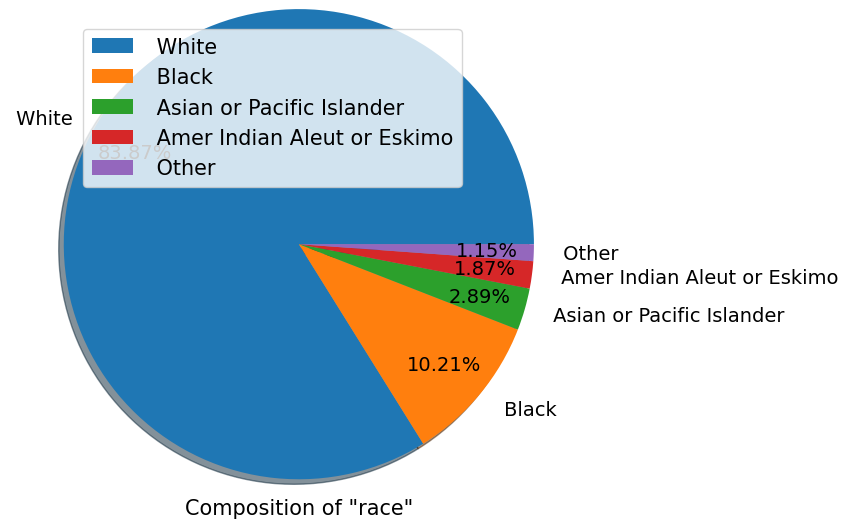

In [42]:
# checking the target
plt.figure(figsize=(14,7))

# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df["race"].value_counts(),
        labels=list(df["race"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel("")
plt.xlabel('Composition of "race"', fontsize=15, labelpad=20)
plt.legend(prop={'size': 15},loc='upper left')
plt.subplots_adjust(wspace=0.4)
plt.show()

In [43]:
df['race'].unique()

array([' White', ' Black', ' Asian or Pacific Islander',
       ' Amer Indian Aleut or Eskimo', ' Other'], dtype=object)

In [44]:
print('Whites having income below limit:',len(df.loc[(df['race']==' White') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['race']==' White')]) * 100, '%')
print('Non-Whites having income below limit:',len(df.loc[(df['race']!=' White') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['race']!=' White')]) * 100, '%')

Whites having income below limit: 93.26272416324719 %
Non-Whites having income below limit: 96.56703166617342 %


There is no big difference. Hence there is no discrimination

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Question 2: Does number of employed persons matter?</font>

In [46]:
print('Employed more than 1 but income is below limit:',len(df.loc[(df['total_employed']>1) & (df['income_above_limit']=='Below limit')])/len(df.loc[(hypothesis_df['total_employed']>1)]) * 100, '%')
print('Employed only 1 but income is below limit:',len(df.loc[(df['total_employed']==1) & (df['income_above_limit']=='Below limit')])/len(df.loc[(hypothesis_df['total_employed']==1)]) * 100, '%')
print('None employed and income is below limit:',len(df.loc[(df['total_employed']==0) & (df['income_above_limit']=='Below limit')])/len(df.loc[(hypothesis_df['total_employed']==0)]) * 100, '%')

Employed more than 1 but income is below limit: 87.92360338172259 %
Employed only 1 but income is below limit: 91.140123988997 %
None employed and income is below limit: 99.36337994597172 %


In [47]:
print('People above income limit with more than 1 employed:',len(df.loc[(df['total_employed']>1) & (df['income_above_limit']=='Above limit')]))
print('People above income limit with only 1 employed:',len(df.loc[(df['total_employed']==1) & (df['income_above_limit']=='Above limit')]))

People above income limit with more than 1 employed: 10199
People above income limit with only 1 employed: 2158


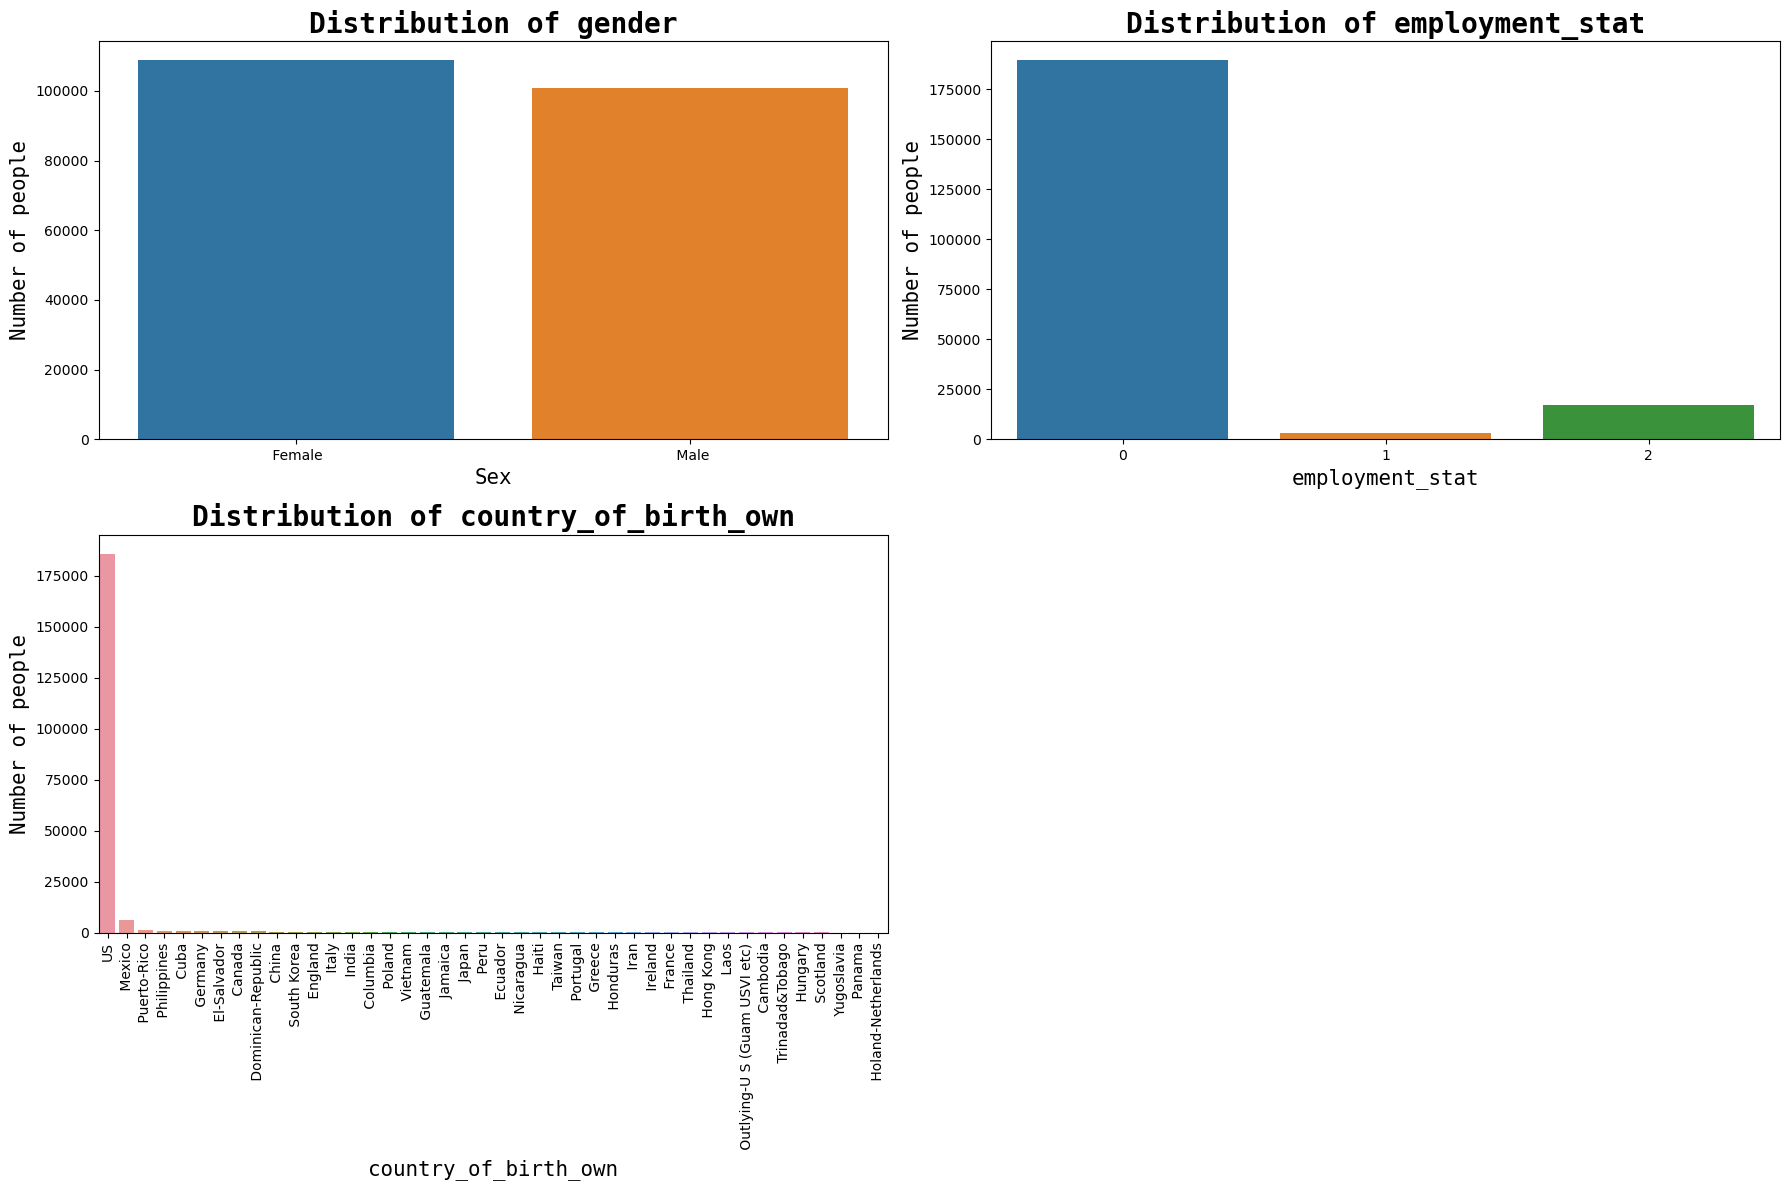

In [48]:
fig, axes = plt.subplots(2,2,figsize=(18, 12))

# Plot the distribution of gender
gender = df['gender'].value_counts()
sns.barplot(x=gender.index, y=gender.values, ax=axes[0,0])
axes[0,0].set_title('Distribution of gender', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[0,0].set_xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,0].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,0].tick_params(labelsize=10)

# Plot the distribution of employment_stat
employment_stat = df['employment_stat'].value_counts()
sns.barplot(x=employment_stat.index, y=employment_stat.values, ax=axes[0,1])
axes[0,1].set_title('Distribution of employment_stat', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[0,1].set_xlabel('employment_stat', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,1].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,1].tick_params(labelsize=10)

# Plot the distribution of country_of_birth_own
country_of_birth_own = df['country_of_birth_own'].value_counts()
sns.barplot(x=country_of_birth_own.index, y=country_of_birth_own.values, ax=axes[1,0])
axes[1,0].set_title('Distribution of country_of_birth_own', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[1,0].set_xlabel('country_of_birth_own', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[1,0].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[1,0].tick_params(labelsize=10)
axes[1,0].set_xticklabels(country_of_birth_own.index, rotation=90)

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

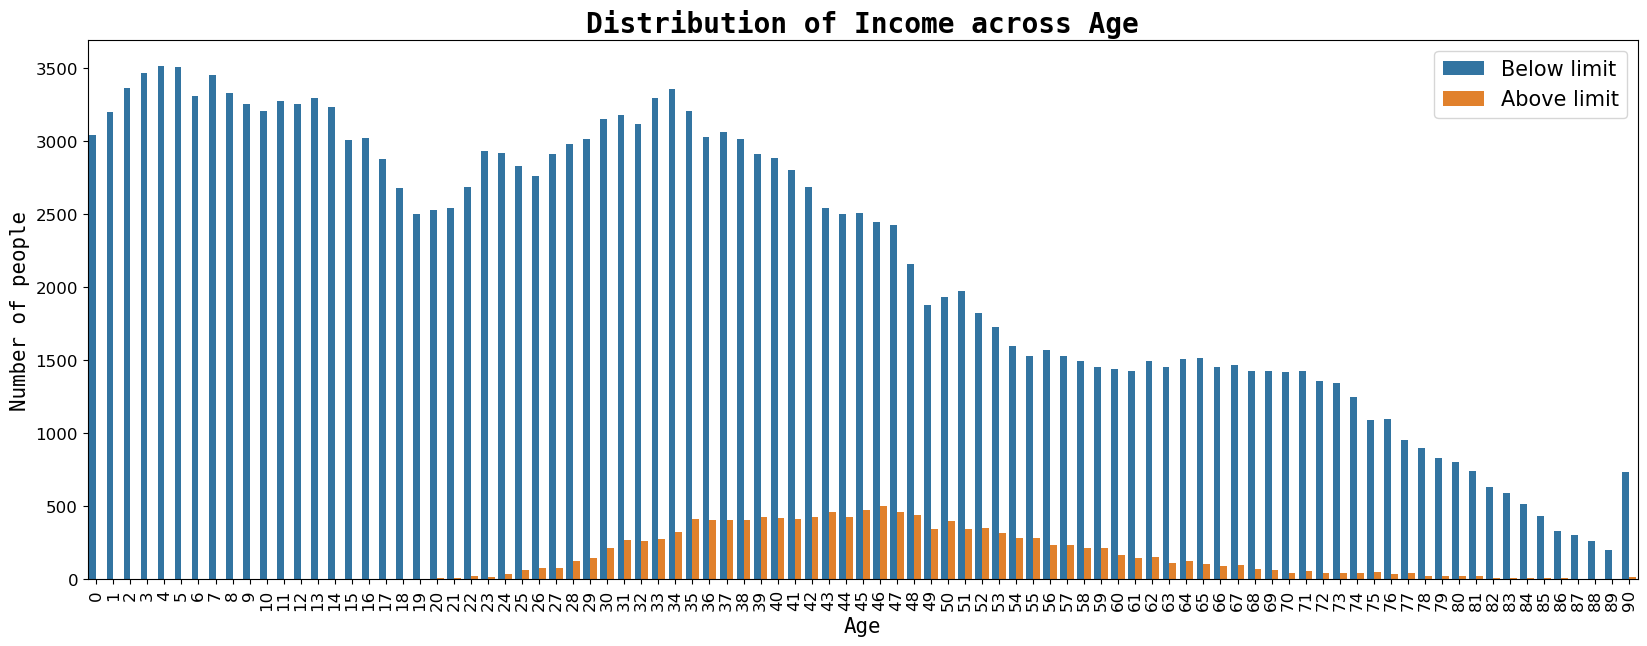

In [49]:
# Creating a countplot of income across age
plt.figure(figsize=(20, 7))
sns.countplot(x=df['age'], hue=df['income_above_limit'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.legend(loc=1, prop={'size': 15})
plt.show()

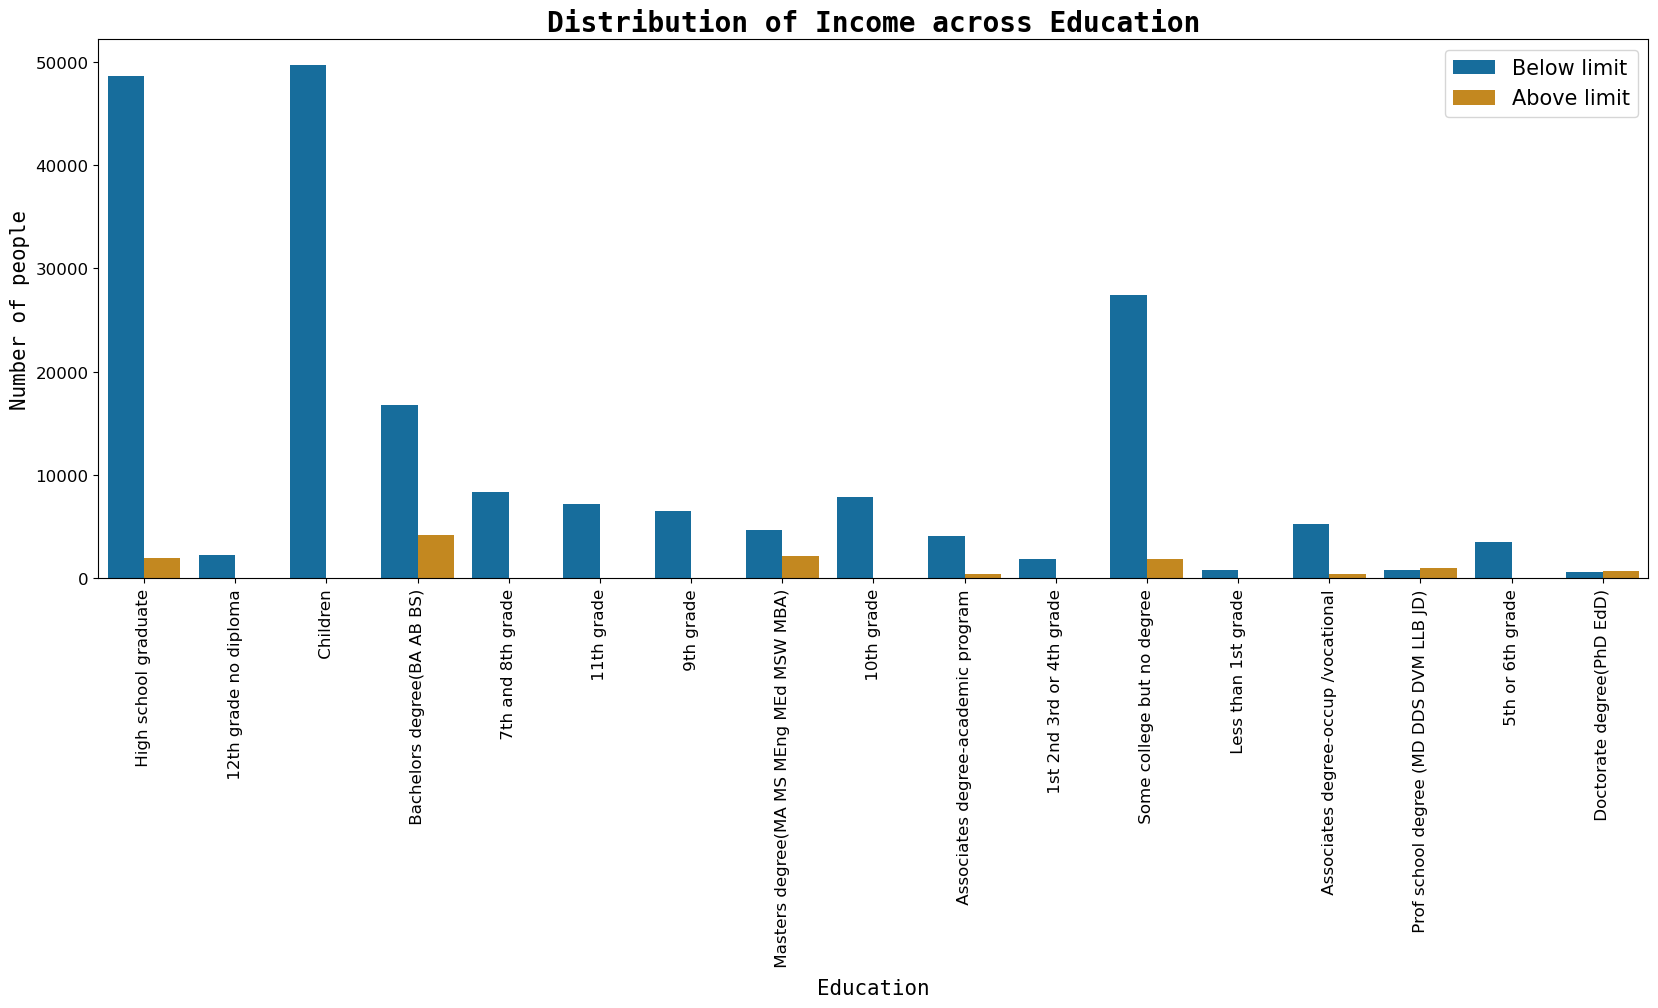

In [50]:
# Creating a countplot of income across education
plt.figure(figsize=(20, 7))
sns.countplot(x=df['education'],
              hue=df['income_above_limit'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.legend(loc=1, prop={'size': 15})
plt.show()

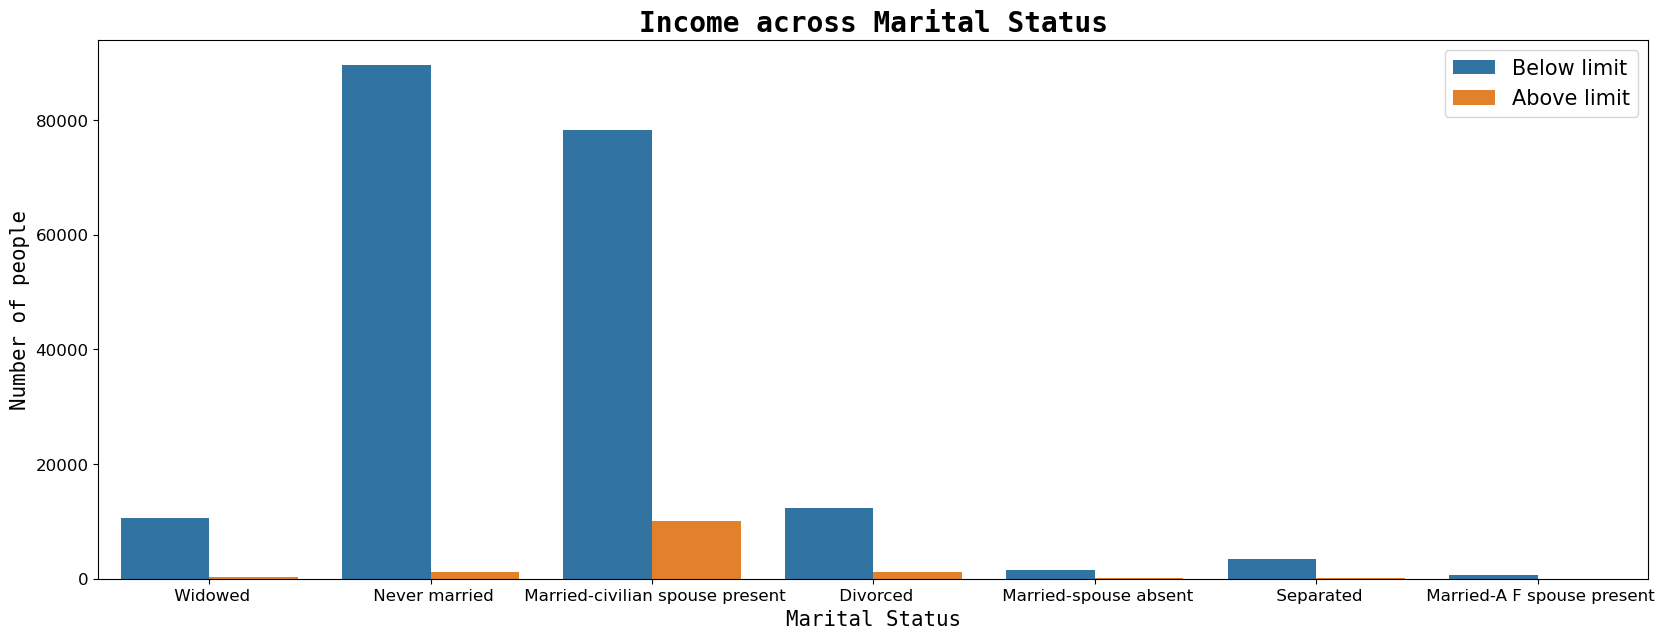

In [51]:
# Creating a countplot of income across Marital Status
plt.figure(figsize=(20, 7))
sns.countplot(x=df['marital_status'], hue=df['income_above_limit'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

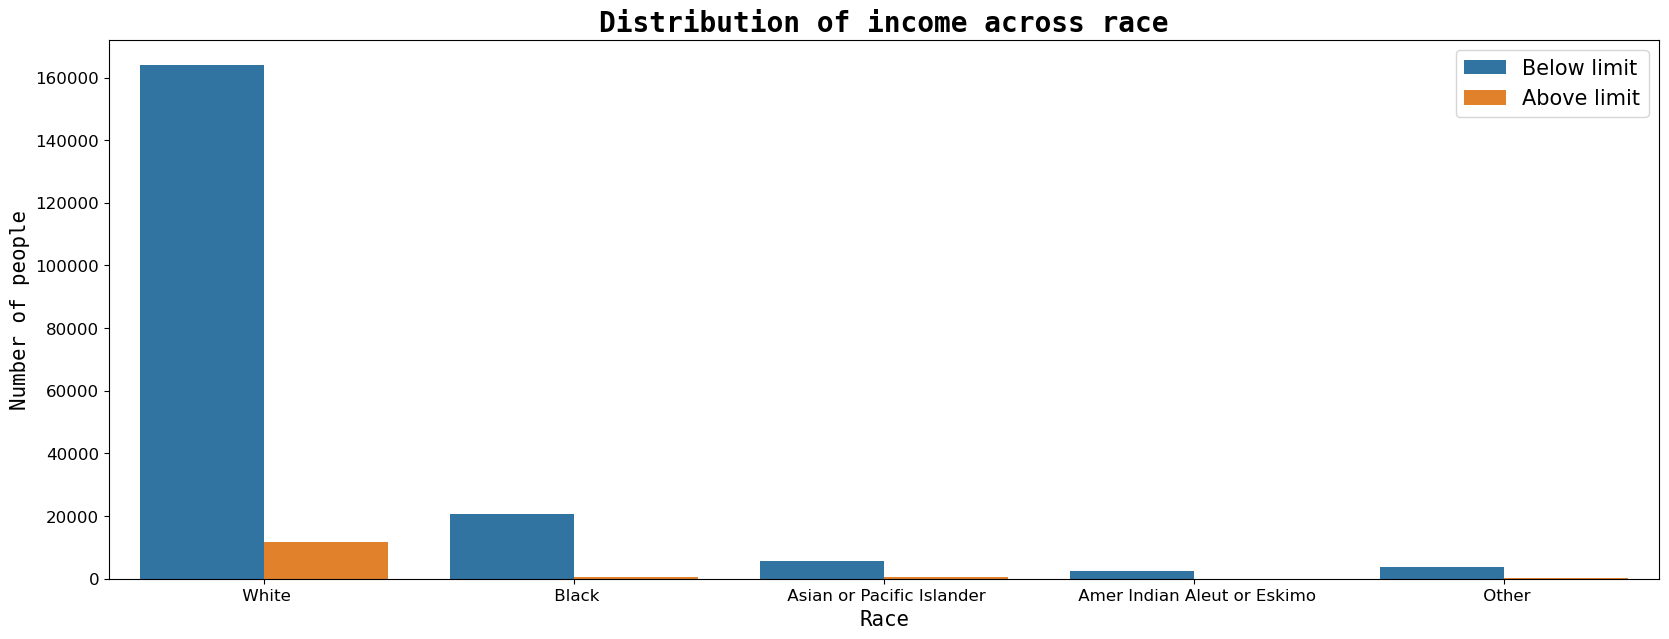

In [52]:
# Creating a countplot of income across race
plt.figure(figsize=(20, 7))
sns.countplot(x=df['race'], hue=df['income_above_limit'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

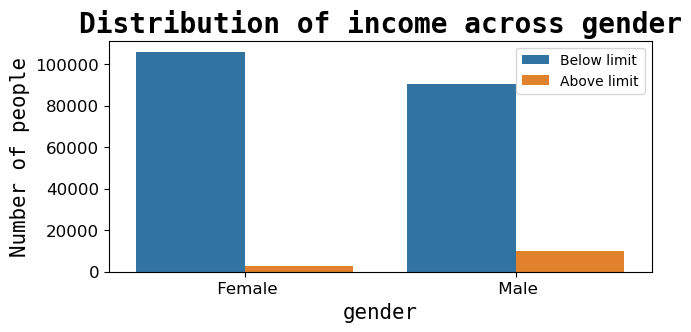

In [53]:
# Creating a countplot of income across sex
plt.figure(figsize=(7, 3))
sns.countplot(x=df['gender'], hue=df['income_above_limit'])
plt.title('Distribution of income across gender', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('gender', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

In [54]:
df.replace({'Below limit':0,'Above limit':1},inplace=True)

C:\Users\heman\.conda\envs\ML-income\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



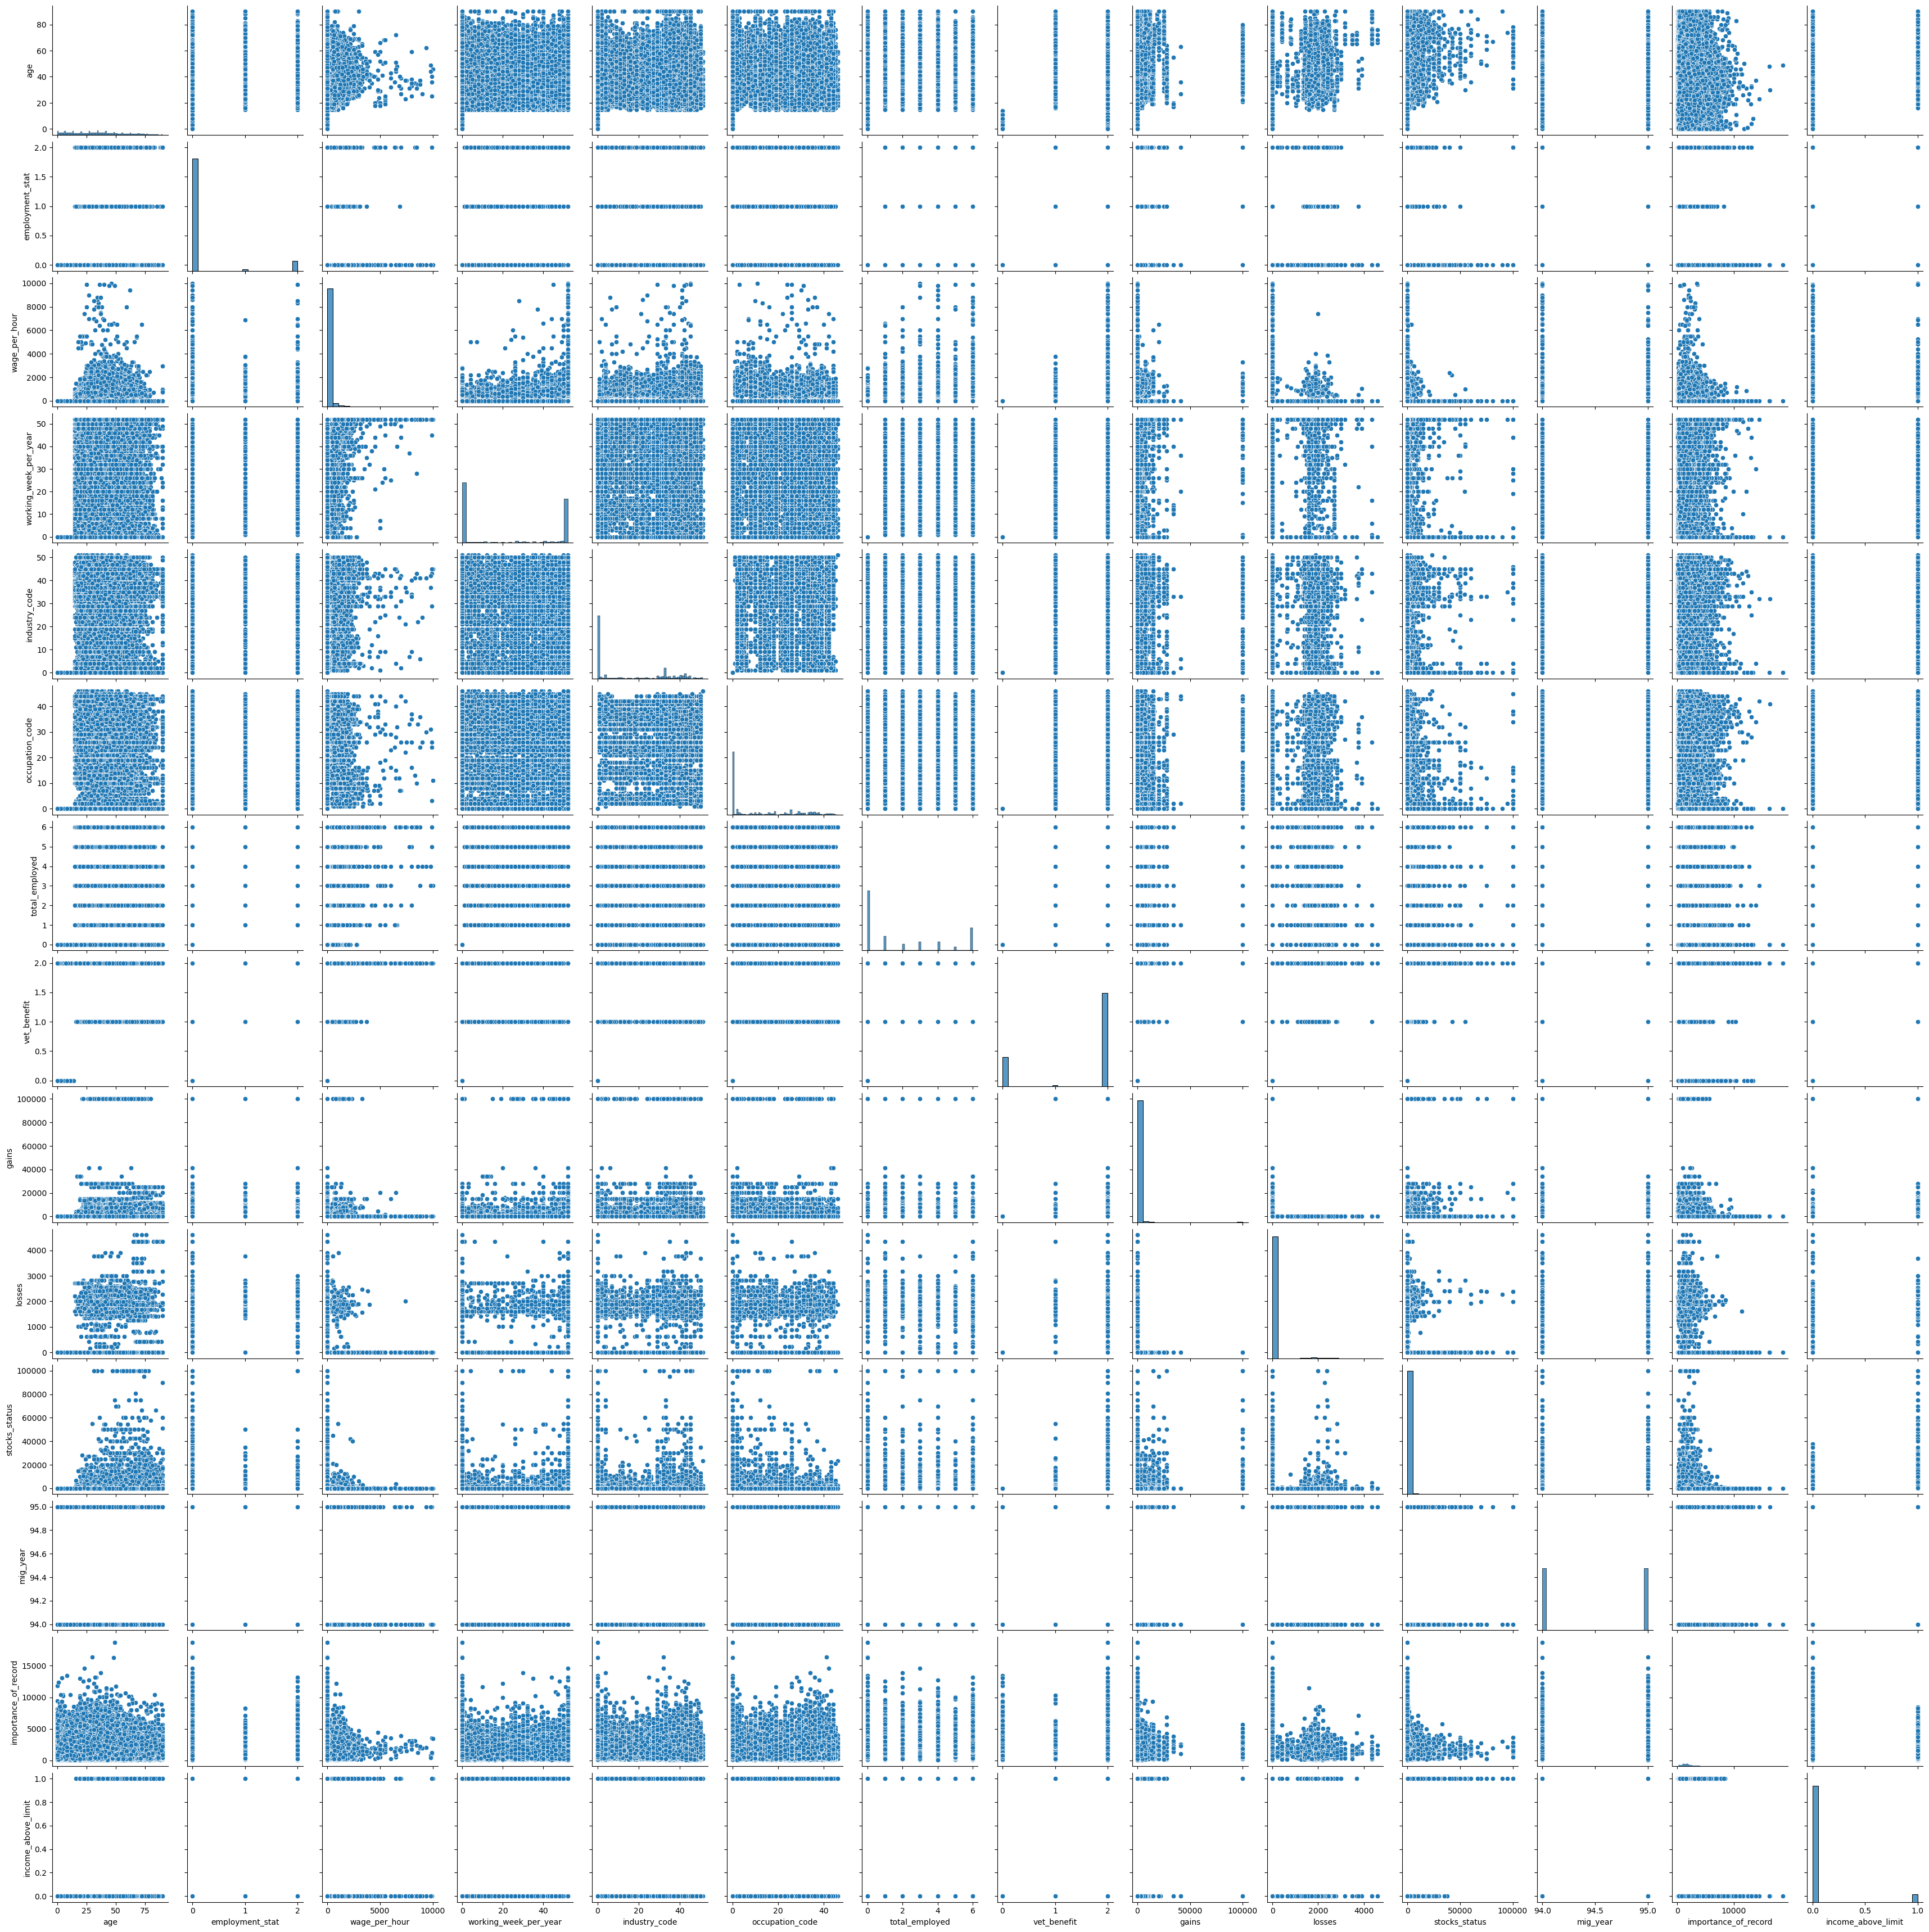

In [55]:
# Creating a pairplot of dataset
sns.pairplot(df)
plt.show()

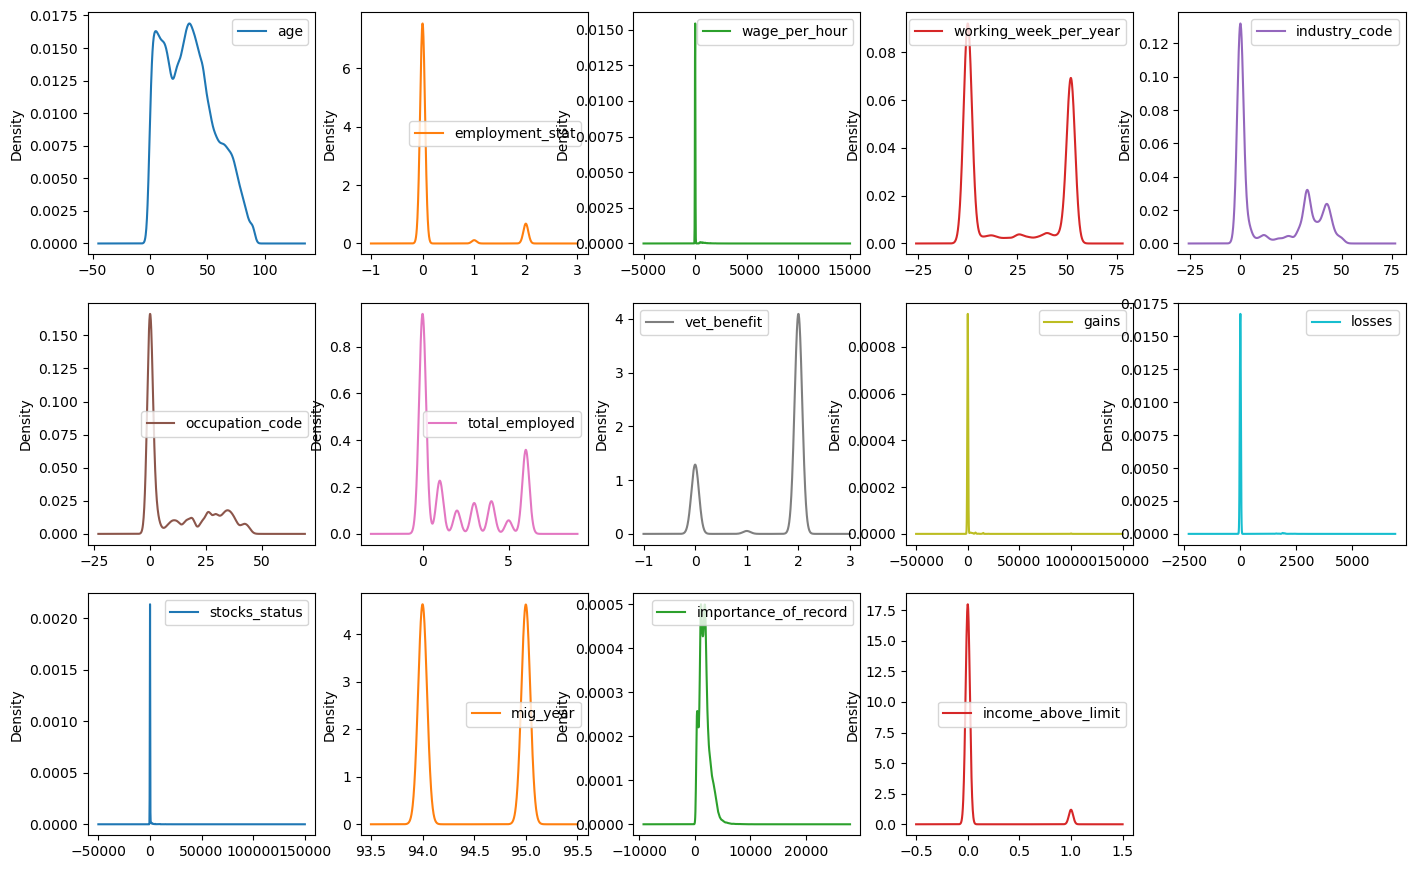

In [56]:
df.plot(kind="density", 
                subplots=True, 
                layout = (6,5), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False);

In [58]:
hypothesis_df=hypothesis_df.drop(['id'],axis=1)

In [60]:
hypothesis_df.replace({' 7th and 8th grade':'upto 12th',' Less than 1st grade':'upto 12th',' 1st 2nd 3rd or 4th grade':'upto 12th',
                ' 5th or 6th grade':'upto 12th',' 9th grade':'upto 12th',' 11th grade':'upto 12th',
                ' 10th grade':'upto 12th',' 12th grade no diploma':'upto 12th'},inplace=True)

# <span style="font-family:cursive;text-align:center">⚙️ Preprocessing</span>

In [ ]:
# / RTA DATASET


# null values (imputation, missing values)
# high variability (encoding)
# imbalance (sampling)



In [64]:
df.isna().sum()

id                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [ ]:
# > 80% you can drop (the column should also be insignificant)
# < 80% 
#    - replacing (mean, median, mode)
#    - forward, backward 
#    - imputers (predict numm values) (knn imputer, simple imputer)



# "na" "unknown" NaN

# MAR, MNAR, MCAR

# Missing not at random  -  have not been found (cannot be replaced by any value) (extra category)



In [65]:
# dropping columns that can cause imbalance while imputation
df.drop(columns = ['education_institute', 'unemployment_reason', 'is_labor_union', 'under_18_family', 'veterans_admin_questionnaire', 'residence_1_year_ago', 'old_residence_reg', 'old_residence_state'], inplace=True)

In [66]:
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = df[feat].mode()[0]
    df[feat].fillna(mode, inplace=True)

In [67]:
df.isna().sum() 

id                                0
age                               0
gender                            0
education                         0
class                             0
marital_status                    0
race                              0
is_hispanic                       0
employment_commitment             0
employment_stat                   0
wage_per_hour                     0
working_week_per_year             0
industry_code                     0
industry_code_main                0
occupation_code                   0
occupation_code_main              0
total_employed                    0
household_stat                    0
household_summary                 0
vet_benefit                       0
tax_status                        0
gains                             0
losses                            0
stocks_status                     0
citizenship                       0
mig_year                          0
country_of_birth_own              0
country_of_birth_father     

### <span style="font-family:cursive;text-align:center"> Encoding</span>

In [ ]:
# label encoding: ordinal (order) ranks (V)
# one-hot encoding (binary) nominal data 0,1 (X)

# target encoding (look into it in the second)

In [ ]:
# If you are using a pre-built function => split data before encoding
# if you are using own function => you can do either

#  ideally split the data

In [68]:
def ordinal_encoder(df, feats): 
    for feat in feats:    
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

df = ordinal_encoder(df, df.drop(['income_above_limit'], axis=1).columns)
df.shape

(209499, 35)

In [69]:
df.head()

id  age  gender  education  class  marital_status  race  is_hispanic  \
0   0   79       0         12      3               6     4            0   
1   1   65       0         12      3               6     4            0   
2   2   21       1          2      0               4     2            0   
3   3    2       0         10      3               4     1            0   
4   4   70       1         12      3               2     4            0   

   employment_commitment  employment_stat  ...  mig_year  \
0                      2                0  ...         1   
1                      0                0  ...         0   
2                      0                0  ...         0   
3                      0                0  ...         0   
4                      2                0  ...         1   

   country_of_birth_own  country_of_birth_father  country_of_birth_mother  \
0                    41                       41                       41   
1                    41                       41                       41   
2                    41                       41                       41   
3                    41                       18                       18   
4                    41                       41                       41   

   migration_code_change_in_msa  migration_prev_sunbelt  \
0                             7                       0   
1                             7                       0   
2                             7                       0   
3                             7                       0   
4                             7                       0   

   migration_code_move_within_reg  migration_code_change_in_reg  \
0                               7                             6   
1                               7                             6   
2                               7                             6   
3                               7                             6   
4                               7                             6   

   importance_of_record  income_above_limit  
0                 55690                   0  
1                 76194                   0  
2                 51881                   0  
3                 39247                   0  
4                 47108                   0  

[5 rows x 35 columns]

In [70]:
df.to_csv('selected_features.csv', index=False)

In [73]:
from collections import Counter
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)




import warnings
warnings.filterwarnings('ignore')

<Axes: >

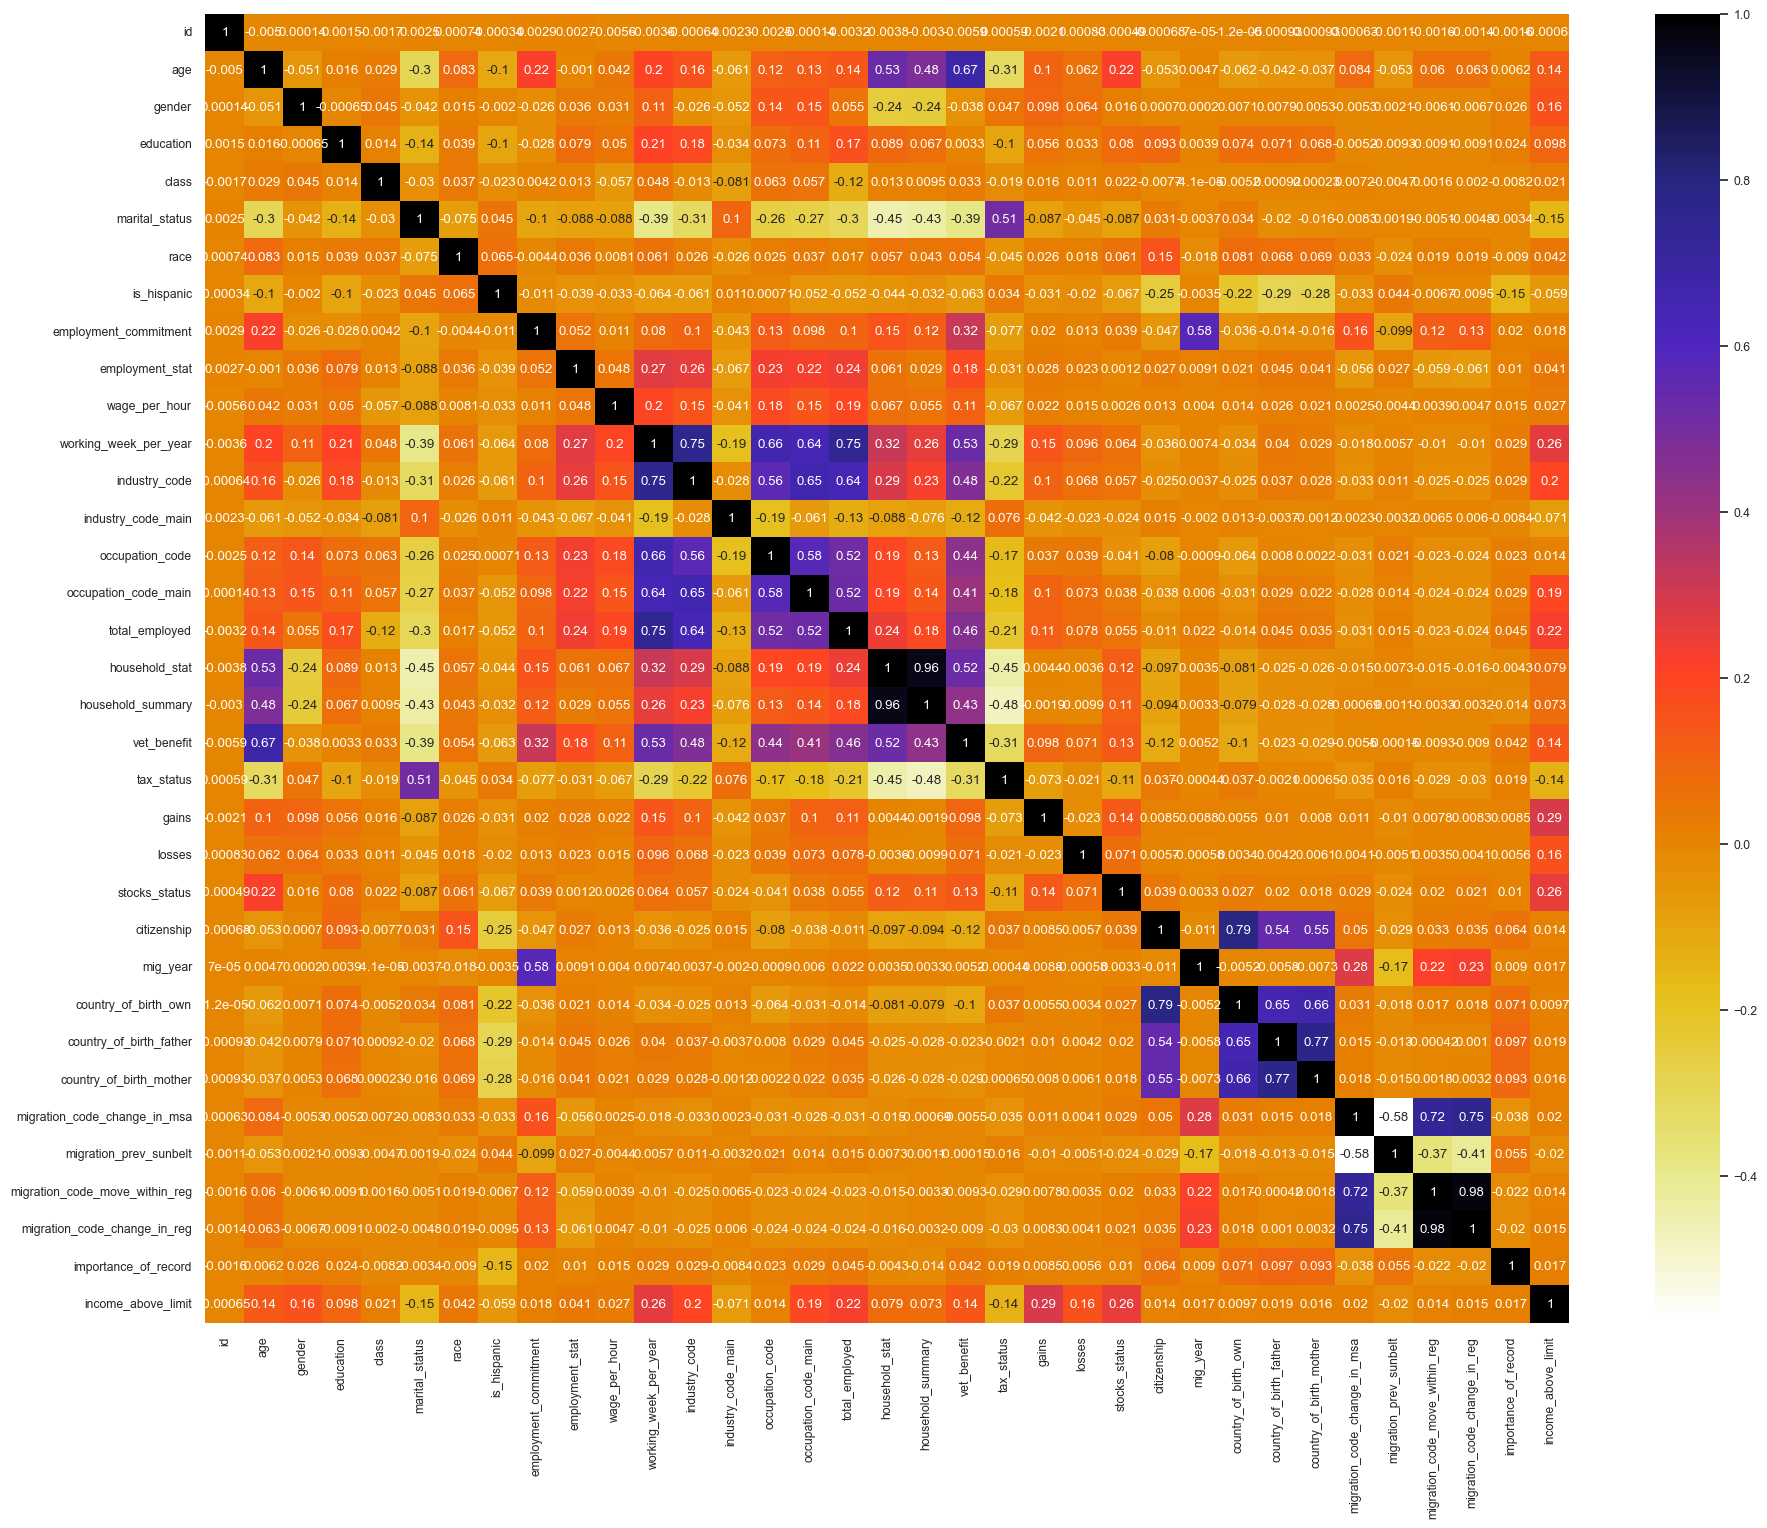

In [74]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
In this dataset, the most number of people are young, white, male, high school graduates working 50 weeks per year.

From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with capital gains, total_employed, industry code, working week per year

In [75]:
for i in ['wage_per_hour','gains','losses','stocks_status','importance_of_record']:
    
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_bridge=df[i].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[i].quantile(0.75)+(IQR*1.5)
    
    outs = []
    
    for j in df[i]:
        if j<lower_bridge:
            outs.append(j)
    
    for k in df[i]:
        if k>upper_bridge:
            outs.append(k)

    print(f'The percentage of outliers in {i}:',(len(outs)/len(df)*100),'%')

The percentage of outliers in wage_per_hour: 5.659215557114831 %
The percentage of outliers in gains: 3.7374880071026593 %
The percentage of outliers in losses: 1.9389114029183911 %
The percentage of outliers in stocks_status: 10.516517978606103 %
The percentage of outliers in importance_of_record: 0.0 %


<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

As the outliers percent are less we will proceed with retaining information and check if transformation can help

In [78]:
df.head()

id  age  gender  education  class  marital_status  race  is_hispanic  \
0   0   79       0         12      3               6     4            0   
1   1   65       0         12      3               6     4            0   
2   2   21       1          2      0               4     2            0   
3   3    2       0         10      3               4     1            0   
4   4   70       1         12      3               2     4            0   

   employment_commitment  employment_stat  ...  mig_year  \
0                      2                0  ...         1   
1                      0                0  ...         0   
2                      0                0  ...         0   
3                      0                0  ...         0   
4                      2                0  ...         1   

   country_of_birth_own  country_of_birth_father  country_of_birth_mother  \
0                    41                       41                       41   
1                    41                       41                       41   
2                    41                       41                       41   
3                    41                       18                       18   
4                    41                       41                       41   

   migration_code_change_in_msa  migration_prev_sunbelt  \
0                             7                       0   
1                             7                       0   
2                             7                       0   
3                             7                       0   
4                             7                       0   

   migration_code_move_within_reg  migration_code_change_in_reg  \
0                               7                             6   
1                               7                             6   
2                               7                             6   
3                               7                             6   
4                               7                             6   

   importance_of_record  income_above_limit  
0                 55690                   0  
1                 76194                   0  
2                 51881                   0  
3                 39247                   0  
4                 47108                   0  

[5 rows x 34 columns]

In [77]:
df.drop(columns=['household_stat'],axis=1,inplace=True)

### <span style="font-family:cursive;text-align:center"> Upsampling</span>

In [79]:
X = df.drop('income_above_limit', axis=1)
y = df['income_above_limit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(146649, 33) (62850, 33) (146649,) (62850,)


In [39]:
pip install scikit-learn==1.2.2


     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.1/8.3 MB 1.9 MB/s eta 0:00:05
     - -------------------------------------- 0.2/8.3 MB 2.7 MB/s eta 0:00:03
     -- ------------------------------------- 0.5/8.3 MB 3.8 MB/s eta 0:00:03
     --- ------------------------------------ 0.7/8.3 MB 3.8 MB/s eta 0:00:03
     ---- ----------------------------------- 0.9/8.3 MB 4.0 MB/s eta 0:00:02
     ----- ---------------------------------- 1.1/8.3 MB 4.2 MB/s eta 0:00:02
     ------ --------------------------------- 1.4/8.3 MB 4.1 MB/s eta 0:00:02
     ------- -------------------------------- 1.6/8.3 MB 4.3 MB/s eta 0:00:02
     -------- ------------------------------- 1.8/8.3 MB 4.4 MB/s eta 0:00:02
     --------- ------------------------------ 2.0/8.3 MB 4.5 MB/s eta 0:00:02
     ----------- ---------------------------- 2.3/8.3 MB 4.6 MB/s eta 0:00:02
     ------------ --------------------------- 2.6/8.3 MB 4.6 MB/s eta 

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= 0, n=137567 (93.81%)
Class= 1, n=9082 (6.19%)
Class= 0, n=137567 (50.00%)
Class= 1, n=137567 (50.00%)
Upsampled data shape:  (275134, 33) (275134,)


In [82]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['income_above_limit']), pd.DataFrame(y_test, columns = ['income_above_limit']).columns)['income_above_limit']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['income_above_limit']), pd.DataFrame(y_train, columns = ['income_above_limit']).columns)['income_above_limit']

# <span style="font-family:cursive;text-align:center">🧰 Baseline Modelling</span>

In [ ]:
# analysis on the data => obs, ded, problem
# preprocessing (data cleaning) => prepared dataset ideal for modeling  + feature eng. ()
# modeling



# algorithm(data)  => model
# relation value  => statistics  => prediction





In [84]:
pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/1.4 MB 2.4 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.4 MB 5.9 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.4 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [86]:
from mlxtend.evaluate import mcnemar_table, mcnemar_tables
from mlxtend.plotting import checkerboard_plot, plot_decision_regions
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.evaluate import bias_variance_decomp
from sklearn.decomposition import PCA
%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

In [87]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    bvd = {}
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
        models.append(xgb)


    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
        models.append(extree)
        
    return scores,models

In [88]:
scores,models = modelling(X_train,y_train, X_test, y_test, xgb=True, rf=True, extree=True)
print(scores)

{'xgb': [0.9512012728719172], 'rf': [0.9450914876690533], 'extree': [0.9434049323786794]}


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Accuracy Scores:</u></b><br>
    
*  XGB -> 95.12%<br>
*  Random Forrest -> 94.51%<br>
*  Extra Trees -> 94.34%<br>
  
</div>

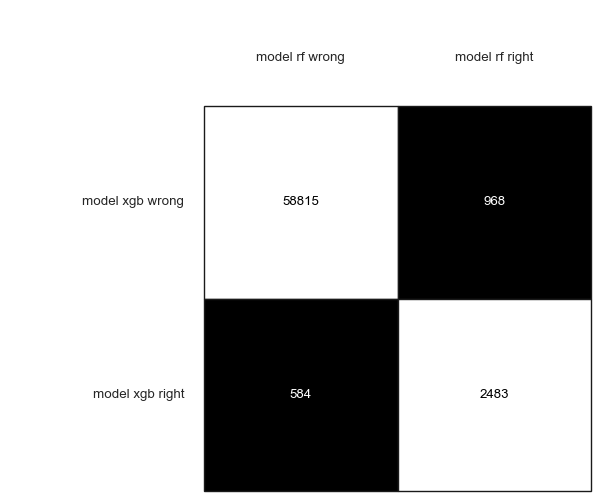

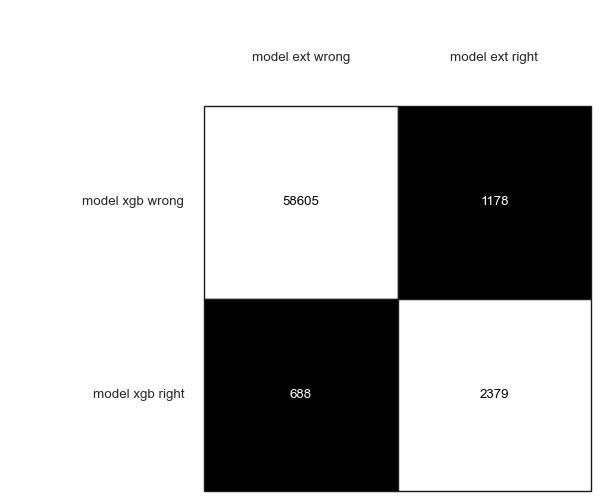

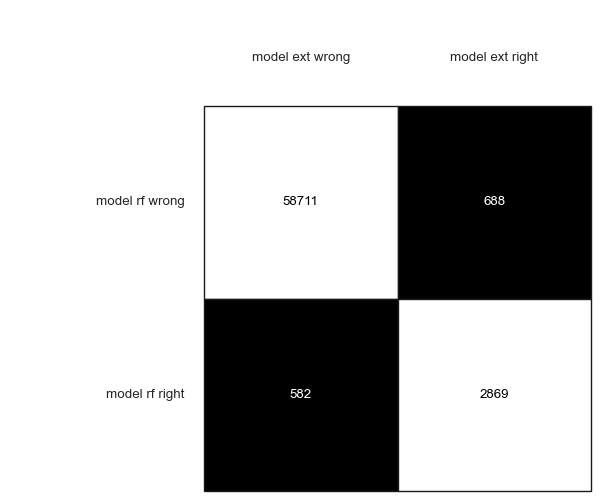

In [89]:
y_pred_xgb = models[0].predict(X_test)
y_pred_rf = models[1].predict(X_test)
y_pred_ext = models[2].predict(X_test)


tb = mcnemar_tables(y_test, 
                    y_pred_xgb,
                    y_pred_rf, 
                    y_pred_ext)

brd = checkerboard_plot(tb['model_0 vs model_1'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model rf wrong', 'model rf right'],
                        row_labels=['model xgb wrong', 'model xgb right'])
plt.show()

brd = checkerboard_plot(tb['model_0 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model ext wrong', 'model ext right'],
                        row_labels=['model xgb wrong', 'model xgb right'])
plt.show()

brd = checkerboard_plot(tb['model_1 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model ext wrong', 'model ext right'],
                        row_labels=['model rf wrong', 'model rf right'])
plt.show()

In [90]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig,filename='model-performance')

In [91]:
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)

In [92]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [93]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as py

In [94]:
model_performance(extree,y_test, y_pred)

In [ ]:
# modeling

# rf, xgb, extratrees

# compared the scores
# check (heatmap) 
# compared recall/f1/precision


# you decided on an algo 



# [material]  => constant (data)
# [capabilities] => variables (hyperparameters)



# param range of change
# estimator model
# search algo

# <span style="font-family:cursive;text-align:center">🛠️ Hyperparameter Tuning</span>

In [95]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),  # [100,200,300,400,500]
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=1,
)


extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.9188730899750666)

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
   <b><u>Parameters:</u></b>
  'ccp_alpha':<span style="color:red">0.0</span>,
  'criterion': <span style="color:red">'gini'</span>,
  'max_depth': <span style="color:red">11</span>,
  'min_samples_split': <span style="color:red">3</span>,
  'n_estimators': <span style="color:red">400</span>
<br>
<b><u>Best Score: </u></b><span style="color:red">0.92</span><br>
</div>

In [96]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params2 = {
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2 = gsearch2.fit(X=X_train, y=y_train)

(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


({'class_weight': 'balanced', 'max_depth': 15, 'min_samples_split': 3},
 0.9367251336689066)

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
   <b><u>Parameters:</u></b>
  'class_weight':<span style="color:red">balanced</span>,
  'max_depth': <span style="color:red">15</span>,
  'min_samples_split': <span style="color:red">3</span>,
<br>
<b><u>Best Score: </u></b><span style="color:red">0.93</span><br>
</div>

In [120]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 400)

extree_tuned.fit(X_train, y_train)
y_pred_tuned = extree_tuned.predict(X_test)

In [98]:
print(extree_tuned.feature_importances_)

[0.00139823 0.04908415 0.01508533 0.02721288 0.00851802 0.05308179
 0.00143514 0.00677104 0.00947119 0.02171755 0.00095616 0.17278298
 0.07242437 0.02135271 0.08208917 0.06671307 0.06056085 0.07949389
 0.03485109 0.06516326 0.05003157 0.01219108 0.04961959 0.00371575
 0.01830262 0.00140083 0.00172991 0.00171769 0.00118166 0.00720873
 0.00062944 0.00060313 0.00150512]


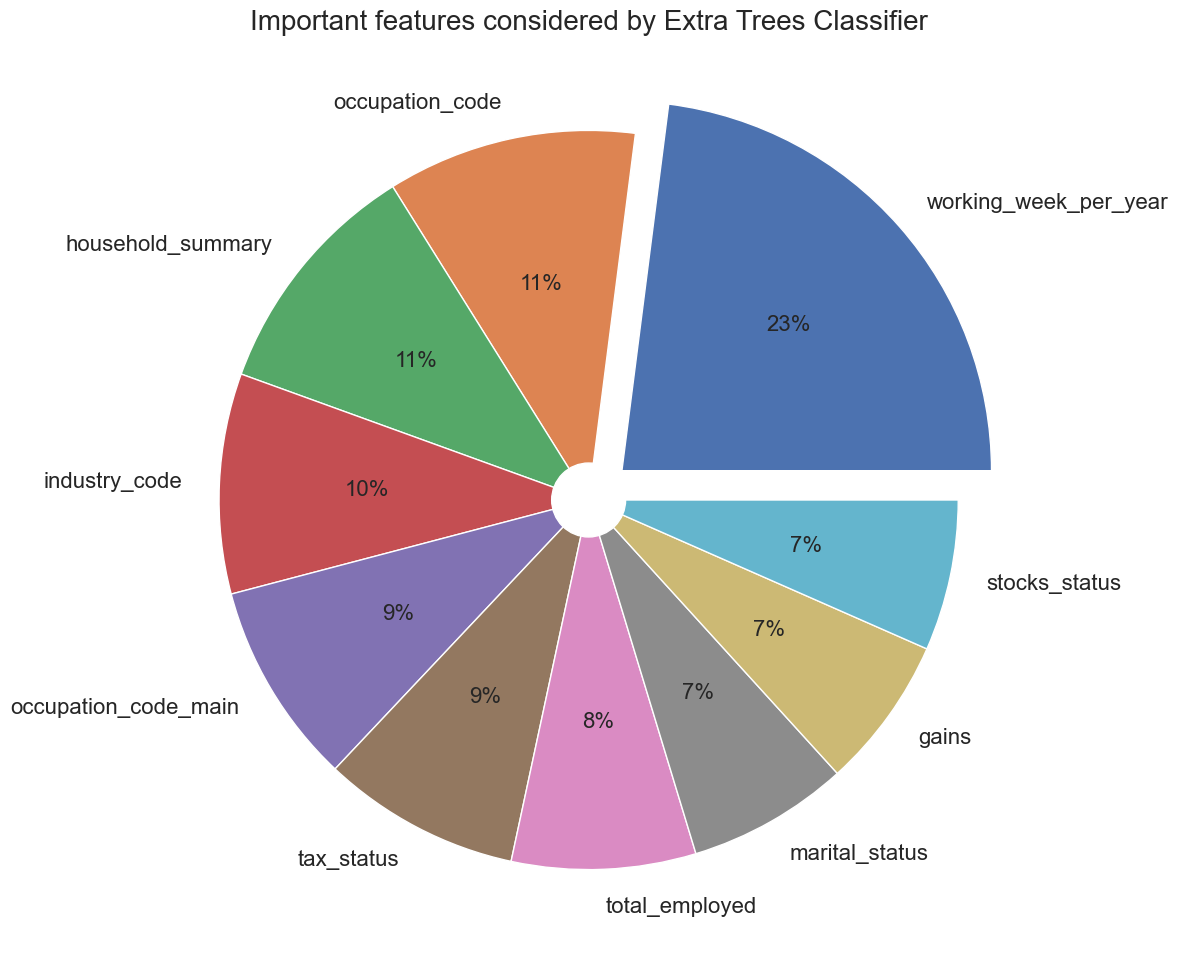

In [99]:
feat_importances = pd.Series(extree_tuned.feature_importances_, index=X.columns)
plt.figure(figsize=(12,12))
myexplode = [0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feat_importances.nlargest(10),labels=feat_importances.nlargest(10).index, autopct='%.0f%%',explode= myexplode,
        textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important features considered by Extra Trees Classifier',fontsize=20)
plt.show()

# Explainable AI

In [102]:
pip install wheel

Note: you may need to restart the kernel to use updated packages.


In [105]:
pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/ee/60/db3416646efc5d6e2c27f75b30bdda9c77d54dad44a5fbb1fe888a2a958b/shap-0.42.1-cp311-cp311-win_amd64.whl.metadata
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
   ---------------------------------------- 0.0/462.3 kB ? eta -:--:--
   --------- ------------------------------ 112.6/462.3 kB 3.2 MB/s eta 0:00:01
   -------------------------------------- - 440.3/462.3 kB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 462.3/462.3 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [106]:

import shap
shap.initjs()
%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

In [114]:
X_sample = X_train.sample(100)
X_sample

id  age  gender  education  class  marital_status  race  \
232780  147408   38       1         15      3               2     4   
131079   63528   33       0         16      3               5     4   
185814  180396   41       1          9      3               2     4   
139115  163088   27       1         16      3               2     4   
34029   155969   39       1          9      5               2     1   
...        ...  ...     ...        ...    ...             ...   ...   
196991   41649   39       0          9      1               0     4   
194910  140431   41       1         12      3               3     4   
142306  106956   73       0         12      3               2     4   
64434   136008   11       0         10      3               4     4   
269664   33735   43       1          9      3               2     4   

        is_hispanic  employment_commitment  employment_stat  wage_per_hour  \
232780            0                      0                0              0   
131079            0                      1                0              0   
185814            0                      0                0              0   
139115            0                      0                0            247   
34029             0                      1                2              0   
...             ...                    ...              ...            ...   
196991            0                      0                0              0   
194910            0                      0                0              0   
142306            0                      2                0              0   
64434             0                      0                0              0   
269664            0                      0                0              0   

        working_week_per_year  industry_code  industry_code_main  \
232780                     52             38                  17   
131079                     52             24                  11   
185814                     52              3                   2   
139115                     51             38                   2   
34029                      52             44                  20   
...                       ...            ...                 ...   
196991                     52             44                  10   
194910                     52             32                  19   
142306                      0              0                  14   
64434                       0              0                  14   
269664                     52             43                  14   

        occupation_code  occupation_code_main  total_employed  \
232780                6                     5               2   
131079                2                     2               5   
185814               14                     2               2   
139115               37                     5               2   
34029                 2                     2               1   
...                 ...                   ...             ...   
196991                8                     9               5   
194910               19                    11               1   
142306                0                     0               0   
64434                 0                     0               0   
269664                3                     8               4   

        household_summary  vet_benefit  tax_status  gains  losses  \
232780                  2            2           3      0       0   
131079                  4            2           0      0       0   
185814                  4            1           2      0       0   
139115                  4            2           2      0       0   
34029                   4            2           2      0       0   
...                   ...          ...         ...    ...     ...   
196991                  5            2           3      0       0   
194910                  4            2           4      0       0   
142

In [115]:
shap_values = shap.TreeExplainer(extree_tuned).shap_values(X_sample)

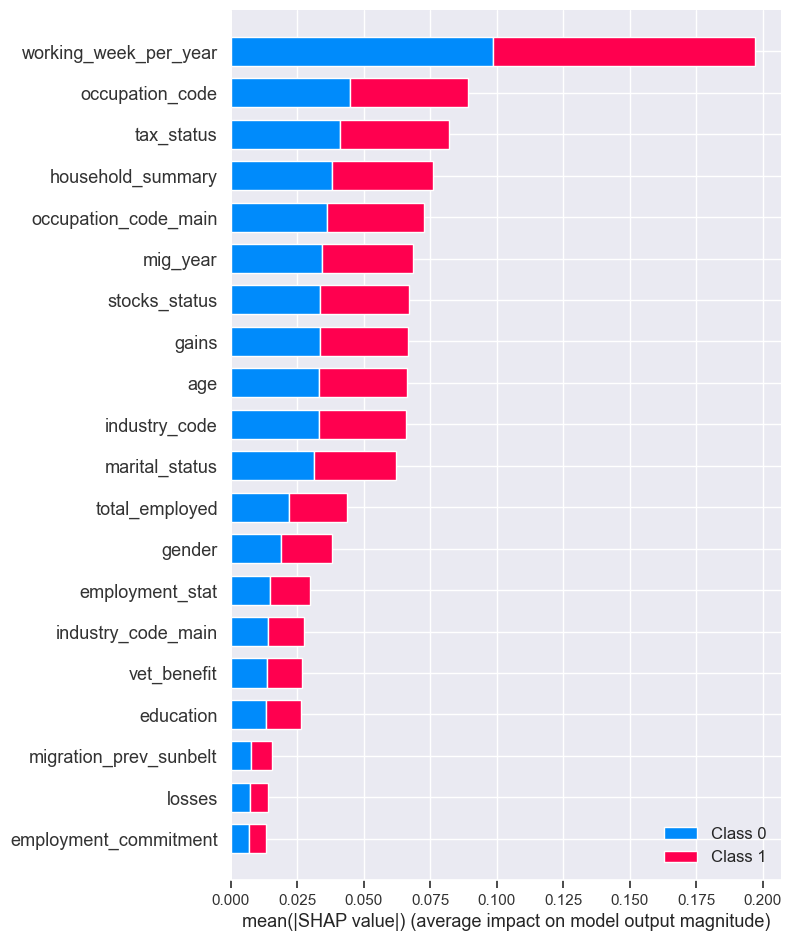

In [116]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

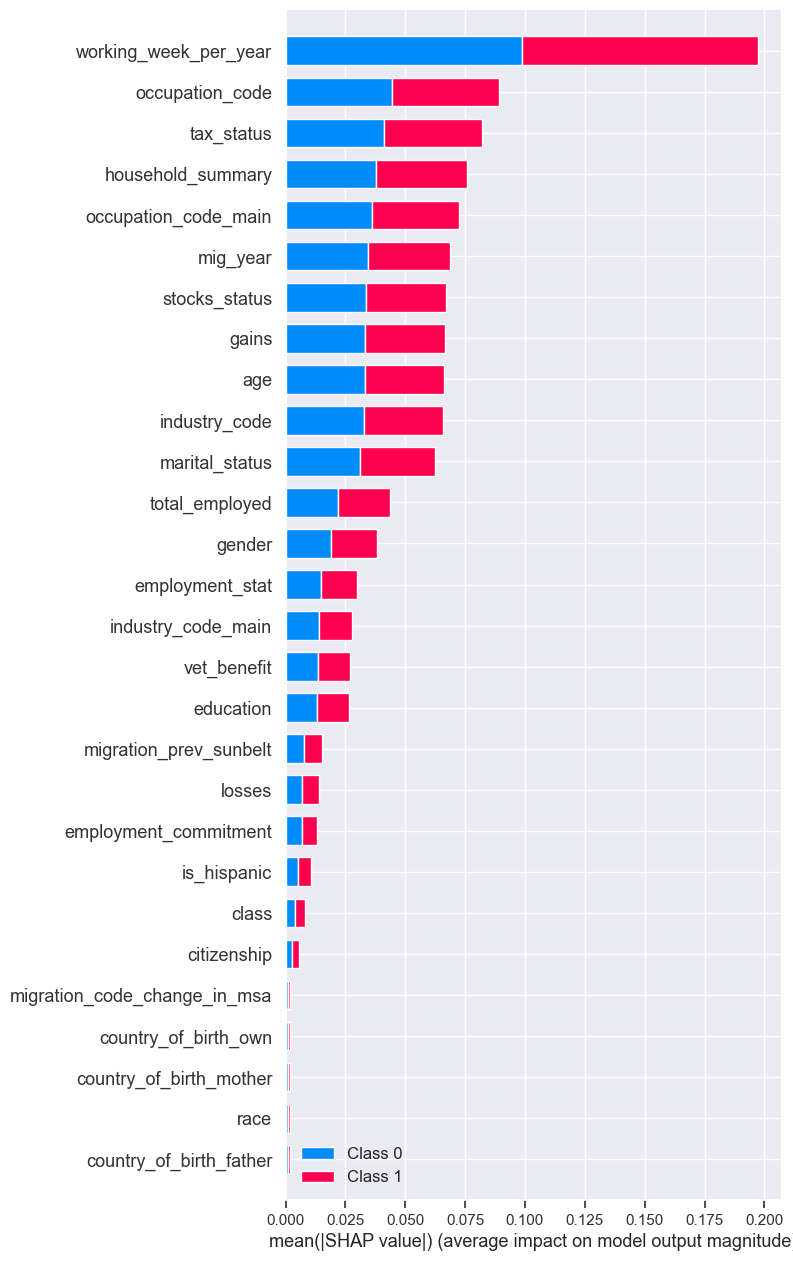

In [117]:
shap.summary_plot(shap_values, X_sample, max_display=28)

In [118]:
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0],
                shap_values[0][:], 
                X_sample)

In [121]:
print(y_pred_tuned[50])
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0], shap_values[1][50], X_sample.iloc[50])

0


In [122]:
i=13
print(y_pred_tuned[i])
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0], shap_values[0][i], X_sample.values[i], feature_names = X_sample.columns)

0


0


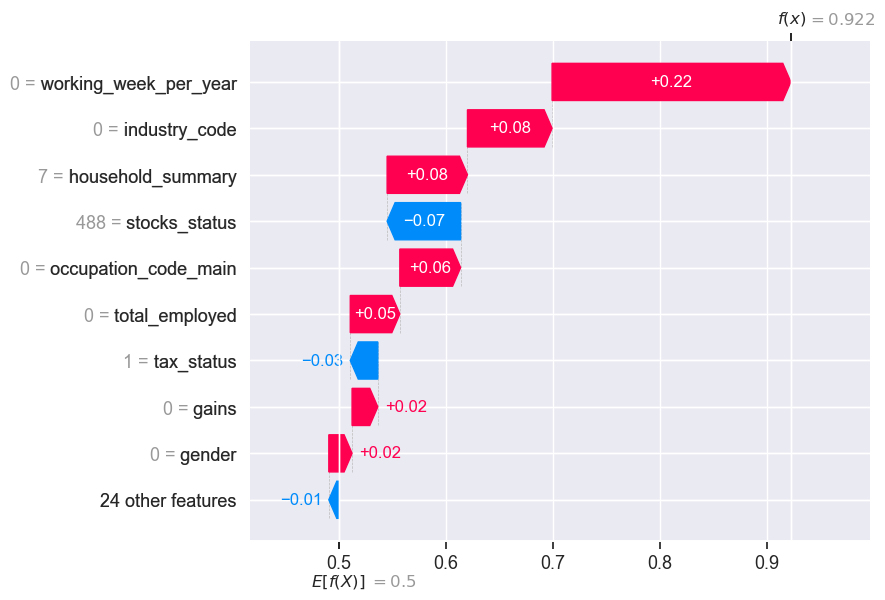

In [123]:
print(y_pred_tuned[10])
row = 10
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=shap.TreeExplainer(extree_tuned).expected_value[0], data=X_sample.iloc[row],  
                                         feature_names=X_sample.columns.tolist()))

In [ ]:
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0],
                shap_values[0][:], 
                X_sample)

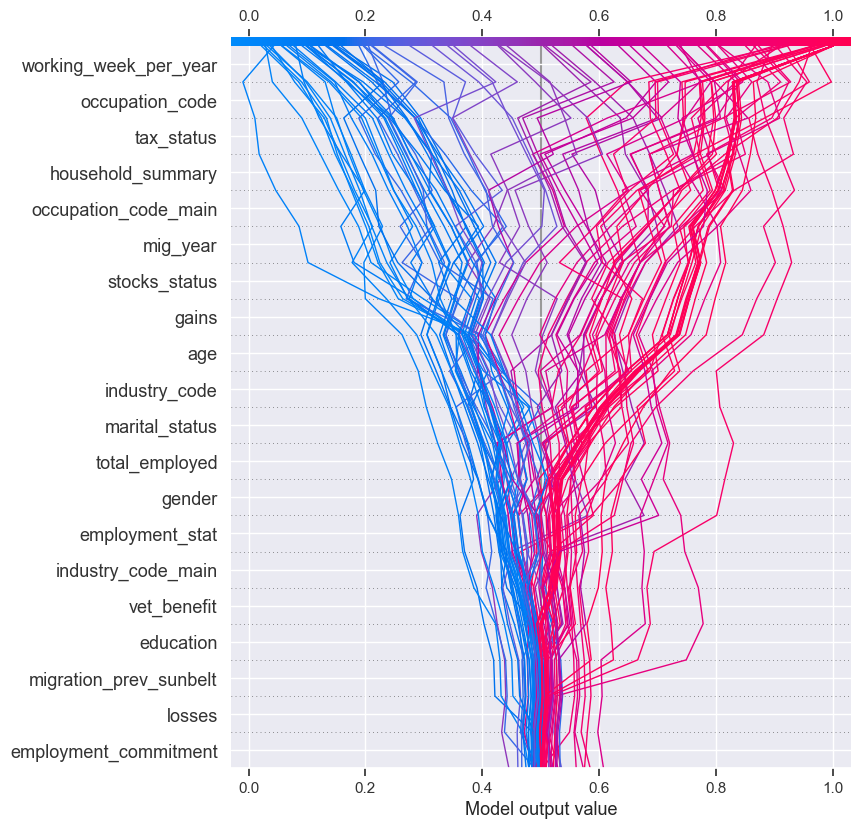

In [139]:
shap.decision_plot(shap.TreeExplainer(extree_tuned).expected_value[0], shap_values[0][:],feature_names=list(X_train.columns))